Step 1: Read All Books & Merge Into One Corpus

In [1]:
import os
import re

# Folder where books are stored
folder_path = "books"

# Initialize an empty string to store all text
corpus = ""

# Loop through all text files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):  # Ensure we only process text files
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read()
            corpus += text + " "  # Add space to separate books

print("Total characters in combined text:", len(corpus))


Total characters in combined text: 3857479


In [2]:
import nltk
from collections import Counter
nltk.download('averaged_perceptron_tagger')

tokens = [word for sent in text for word in nltk.word_tokenize(sent)]
tagged = nltk.pos_tag(tokens)
content_words = [word for word, tag in tagged if tag.startswith('NN') or tag.startswith('VB')]

freq = Counter(content_words)
L = [word for word, count in freq.most_common(100)]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aryanlodha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [105]:
# from collections import defaultdict
# from nltk.tokenize import word_tokenize
# import numpy as np

# # Create index mapping
# word_to_idx = {word: i for i, word in enumerate(L)}
# co_matrix = np.zeros((100, 100), dtype=np.float32)

# for sent in cleaned_sentences:  # already tokenized and cleaned
#     sent_set = set(sent)
#     words_in_L = [w for w in sent_set if w in word_to_idx]
#     for i in range(len(words_in_L)):
#         for j in range(i + 1, len(words_in_L)):
#             idx1 = word_to_idx[words_in_L[i]]
#             idx2 = word_to_idx[words_in_L[j]]
#             co_matrix[idx1][idx2] += 1
#             co_matrix[idx2][idx1] += 1  # symmetric


In [4]:
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt

# tsne = TSNE(n_components=2)
# reduced = tsne.fit_transform(co_matrix)

# cluster = AgglomerativeClustering(n_clusters=5)
# labels = cluster.fit_predict(co_matrix)

# plt.scatter(reduced[:, 0], reduced[:, 1], c=labels)
# for i, word in enumerate(L):
#     plt.annotate(word, (reduced[i, 0], reduced[i, 1]))
# plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aryanlodha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


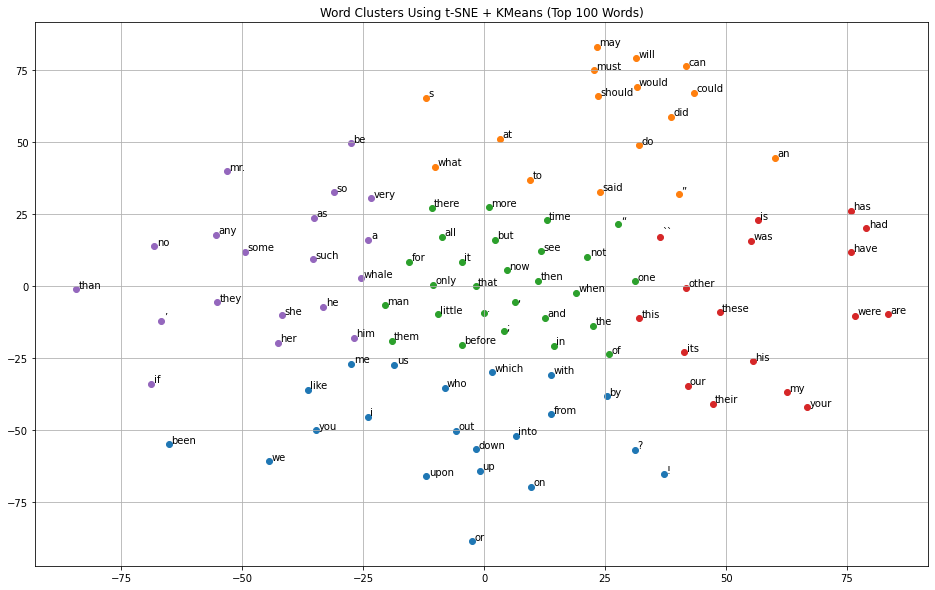

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# -------------------------------
# Loading and tokenize corpus
# -------------------------------
with open("cleaned_corpus_final.txt", "r") as f:
    raw_text = f.read()

sentences = [word_tokenize(line.lower()) for line in raw_text.split("\n") if line.strip()]

# -------------------------------
# Training Word2Vec on your corpus
# -------------------------------
model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)
model.train(sentences, total_examples=len(sentences), epochs=10)

# -------------------------------
# Getting Top 100 frequent words from vocab
# -------------------------------
vocab = list(model.wv.index_to_key)[:100]
word_vectors = np.array([model.wv[word] for word in vocab])

# -------------------------------
# Reducing to 2D using t-SNE
# -------------------------------
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(word_vectors)

# -------------------------------
# Applying K-Means Clustering
# -------------------------------
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(X_tsne)

# -------------------------------
# Plotting the words
# -------------------------------
plt.figure(figsize=(16, 10))
for i, word in enumerate(vocab):
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1], c=f"C{labels[i]}")
    plt.annotate(word, (X_tsne[i, 0]+0.5, X_tsne[i, 1]+0.5))
plt.title("Word Clusters Using t-SNE + KMeans (Top 100 Words)")
plt.grid(True)
plt.show()


In [6]:
pip install networkx scikit-learn matplotlib nltk


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aryanlodha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


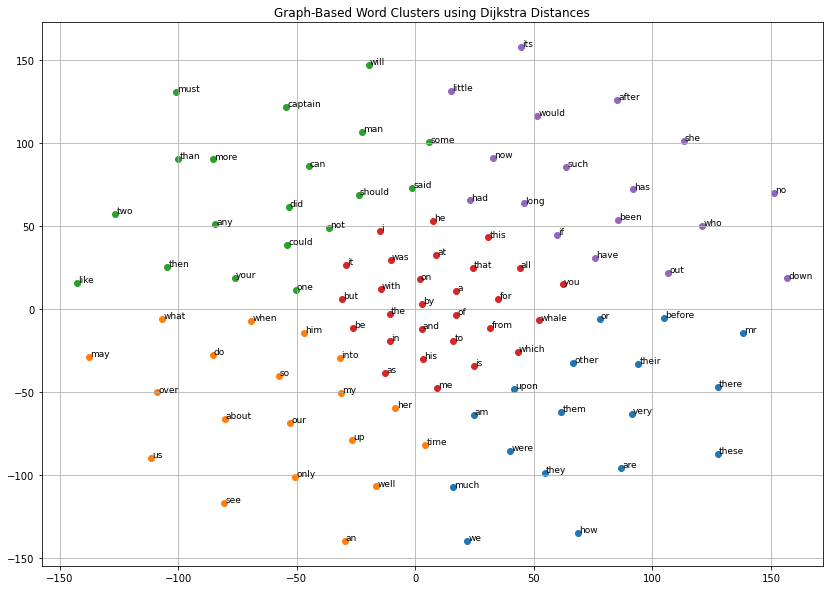

In [ ]:
import networkx as nx
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
import numpy as np
import nltk
nltk.download('punkt')

# -------------------------------
# Load and tokenize corpus
# -------------------------------
with open("cleaned_corpus2.txt", "r") as f:
    raw_text = f.read()

sentences = [word_tokenize(line.lower()) for line in raw_text.split("\n") if line.strip()]

# -------------------------------
# Build co-occurrence graph
# -------------------------------
window_size = 3
cooccurrence = defaultdict(int)
vocab = Counter()

for sent in sentences:
    for i, word in enumerate(sent):
        vocab[word] += 1
        for j in range(i+1, min(i+window_size, len(sent))):
            pair = tuple(sorted((word, sent[j])))
            cooccurrence[pair] += 1

# Filter top N words
top_words = [word for word, _ in vocab.most_common(100)]
G = nx.Graph()

for (w1, w2), weight in cooccurrence.items():
    if w1 in top_words and w2 in top_words:
        G.add_edge(w1, w2, weight=1/weight)  # smaller weight = stronger connection

# -------------------------------
# Compute Dijkstra Shortest Path Distance Matrix
# -------------------------------
nodes = list(G.nodes)
dist_matrix = np.zeros((len(nodes), len(nodes)))

for i, src in enumerate(nodes):
    lengths = nx.single_source_dijkstra_path_length(G, src)
    for j, tgt in enumerate(nodes):
        dist_matrix[i][j] = lengths.get(tgt, np.inf)

# Handle inf (unreachable) by replacing with max distance
max_dist = np.nanmax(dist_matrix[dist_matrix != np.inf])
dist_matrix[dist_matrix == np.inf] = max_dist + 1

# -------------------------------
# Dimensionality Reduction + Clustering
# -------------------------------
tsne = TSNE(n_components=2, metric='precomputed', random_state=42)
embedding = tsne.fit_transform(dist_matrix)

kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(embedding)

# -------------------------------
# Visualization
# -------------------------------
plt.figure(figsize=(14, 10))
for i, word in enumerate(nodes):
    plt.scatter(embedding[i, 0], embedding[i, 1], c=f"C{labels[i]}")
    plt.annotate(word, (embedding[i, 0]+0.5, embedding[i, 1]+0.5), fontsize=9)
plt.title("Graph-Based Word Clusters using Dijkstra Distances")
plt.grid(True)
plt.show()


Step 2: Remove Unwanted Metadata

In [8]:
def clean_metadata(text):
    """Remove Gutenberg headers and footers"""
    text = re.sub(r"\*\*\* START OF THIS PROJECT GUTENBERG EBOOK .*? \*\*\*", "", text, flags=re.DOTALL)
    text = re.sub(r"\*\*\* END OF THIS PROJECT GUTENBERG EBOOK .*? \*\*\*", "", text, flags=re.DOTALL)
    return text.strip()

corpus = clean_metadata(corpus)


Step 3: Lowercase, Remove Punctuation & Numbers

In [9]:
import string

def clean_text(text):
    """Convert to lowercase, remove numbers & punctuation"""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    return text

corpus = clean_text(corpus)


Step 4: Tokenization & Stopword Removal

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Tokenize words
tokens = word_tokenize(corpus)

# Remove stopwords
stop_words = set(stopwords.words("english"))
tokens = [word for word in tokens if word not in stop_words]

print("First 50 words after cleaning:", tokens[:50])


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aryanlodha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aryanlodha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First 50 words after cleaning: ['\ufeffthe', 'project', 'gutenberg', 'ebook', 'frankenstein', 'modern', 'prometheus', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'states', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'reuse', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'wwwgutenbergorg', 'located', 'united', 'states', 'check', 'laws', 'country', 'located', 'using', 'ebook', 'title', 'frankenstein', 'modern', 'prometheus', 'author', 'mary', 'wollstonecraft', 'shelley', 'release']


Step 5: Extract Meaningful Words (POS Tagging)

In [11]:
nltk.download('averaged_perceptron_tagger')

# Get POS tags
pos_tags = nltk.pos_tag(tokens)

# Extract Nouns, Verbs, Adjectives, Adverbs
selected_words = [word for word, tag in pos_tags if tag.startswith(('NN', 'VB', 'JJ', 'RB'))]

print("First 50 selected words:", selected_words[:50])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aryanlodha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


First 50 selected words: ['\ufeffthe', 'project', 'gutenberg', 'ebook', 'frankenstein', 'modern', 'prometheus', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'states', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'copy', 'give', 'reuse', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'wwwgutenbergorg', 'located', 'united', 'states', 'check', 'laws', 'country', 'located', 'using', 'ebook', 'title', 'frankenstein', 'modern', 'prometheus', 'author', 'mary', 'wollstonecraft', 'shelley', 'release', 'date', 'october']


 Step 6: Select Top 100 Words for Clustering

In [12]:
from collections import Counter

# Count word frequency
word_freq = Counter(selected_words)

# Get top 100 words
top_100_words = [word for word, freq in word_freq.most_common(100)]

print("Top 100 words:", top_100_words)


Top 100 words: ['“', '”', '’', 'said', 'man', 'mr', 'whale', 'little', 'captain', 'time', 'see', 'well', 'much', 'long', 'never', 'great', 'know', 'sea', 'first', 'yet', 'still', 'elizabeth', '‘', 'last', 'good', 'think', 'made', 'old', 'day', 'head', 'way', 'say', 'seemed', 'come', 'nothing', 'even', 'chapter', 'soon', 'ever', 'saw', 'project', 'ship', 'eyes', 'sir', 'go', 'came', 'thought', 'peter', 'make', 'work', 'hand', 'many', 'ahab', 'holmes', 'ye', 'heard', 'found', 'men', 'away', 'life', 'however', 'darcy', 'night', 'back', 'look', 'let', 'take', 'water', 'round', 'side', 'right', 'room', 'boat', 'mrs', 'part', 'miss', 'went', 'seen', 'cried', 'father', 'place', 'land', 'air', 'nemo', 'tell', 'almost', 'give', 'far', 'whole', 'towards', 'morning', 'indeed', 'world', 'jack', 'gutenberg™', 'feet', 'left', 'white', 'bennet', 'light']


Handling Non-English & Garbage Text

In [13]:
from nltk.corpus import words

# Load a list of valid English words
nltk.download('words')
valid_words = set(words.words())

# Remove words that are not in the English dictionary
tokens = [word for word in tokens if word in valid_words]

print("First 50 valid words:", tokens[:50])


First 50 valid words: ['project', 'modern', 'use', 'anyone', 'anywhere', 'united', 'world', 'cost', 'almost', 'whatsoever', 'may', 'copy', 'give', 'away', 'reuse', 'project', 'license', 'included', 'united', 'check', 'country', 'title', 'modern', 'author', 'mary', 'release', 'date', 'recently', 'language', 'boss', 'version', 'al', 'de', 'start', 'project', 'modern', 'modern', 'mary', 'contents', 'letter', 'letter', 'letter', 'letter', 'chapter', 'chapter', 'chapter', 'chapter', 'chapter', 'chapter', 'chapter']


[nltk_data] Downloading package words to
[nltk_data]     /Users/aryanlodha/nltk_data...
[nltk_data]   Package words is already up-to-date!


Lemmatization Instead of Stemming
Ensures better word representation while keeping meaning intact.

In [14]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for word in tokens]

print("First 50 lemmatized words:", tokens[:50])


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aryanlodha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


First 50 lemmatized words: ['project', 'modern', 'use', 'anyone', 'anywhere', 'united', 'world', 'cost', 'almost', 'whatsoever', 'may', 'copy', 'give', 'away', 'reuse', 'project', 'license', 'included', 'united', 'check', 'country', 'title', 'modern', 'author', 'mary', 'release', 'date', 'recently', 'language', 'bos', 'version', 'al', 'de', 'start', 'project', 'modern', 'modern', 'mary', 'content', 'letter', 'letter', 'letter', 'letter', 'chapter', 'chapter', 'chapter', 'chapter', 'chapter', 'chapter', 'chapter']


Removing Extremely Rare Words & Overly Frequent Words

In [15]:
min_freq = 3  # Words must appear at least this many times
max_freq = 0.10  # Words must appear in less than 10% of the text

word_counts = Counter(tokens)
total_words = len(tokens)

filtered_tokens = [word for word in tokens if min_freq <= word_counts[word] <= total_words * max_freq]

print("First 50 filtered words:", filtered_tokens[:50])


First 50 filtered words: ['project', 'modern', 'use', 'anyone', 'anywhere', 'united', 'world', 'cost', 'almost', 'whatsoever', 'may', 'copy', 'give', 'away', 'reuse', 'project', 'license', 'included', 'united', 'check', 'country', 'title', 'modern', 'author', 'mary', 'release', 'date', 'recently', 'language', 'version', 'de', 'start', 'project', 'modern', 'modern', 'mary', 'content', 'letter', 'letter', 'letter', 'letter', 'chapter', 'chapter', 'chapter', 'chapter', 'chapter', 'chapter', 'chapter', 'chapter', 'chapter']


Bi-Grams & Tri-Grams for Contextual Clustering

In [16]:
from nltk.util import ngrams

bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

print("First 10 bigrams:", bigrams[:10])
print("First 10 trigrams:", trigrams[:10])


First 10 bigrams: [('project', 'modern'), ('modern', 'use'), ('use', 'anyone'), ('anyone', 'anywhere'), ('anywhere', 'united'), ('united', 'world'), ('world', 'cost'), ('cost', 'almost'), ('almost', 'whatsoever'), ('whatsoever', 'may')]
First 10 trigrams: [('project', 'modern', 'use'), ('modern', 'use', 'anyone'), ('use', 'anyone', 'anywhere'), ('anyone', 'anywhere', 'united'), ('anywhere', 'united', 'world'), ('united', 'world', 'cost'), ('world', 'cost', 'almost'), ('cost', 'almost', 'whatsoever'), ('almost', 'whatsoever', 'may'), ('whatsoever', 'may', 'copy')]


Named Entity Recognition (NER) for Better Word Selection

In [17]:
import spacy
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

spaCy model loaded successfully!


Word Embeddings Instead of Direct Word Clustering

In [18]:
from gensim.models import Word2Vec

# Train a Word2Vec model on our corpus
word2vec_model = Word2Vec([tokens], vector_size=100, window=5, min_count=3, workers=4)

# Get word vector for an example word
word_vector = word2vec_model.wv["science"]
print("Vector representation of 'science':", word_vector)


Vector representation of 'science': [ 0.00691965 -0.00541689 -0.00274245  0.00442726 -0.00555814 -0.00012919
 -0.01029049  0.01141691 -0.00171636  0.00504548 -0.00219425 -0.00122172
 -0.00490707 -0.00560852 -0.00942529 -0.0004809   0.00205568 -0.00724185
  0.00833483 -0.00330062 -0.00236579  0.01118319  0.01141175 -0.00087297
 -0.01025916 -0.00449876 -0.01054546  0.00410722 -0.00887104  0.00252937
  0.00035568  0.00849931  0.00560999 -0.0027622  -0.00792714  0.01047348
 -0.00757109  0.00527778  0.00213673  0.00260125 -0.00644549  0.00236342
  0.0050918   0.00142859 -0.00786779 -0.00178245 -0.00127868 -0.00200071
 -0.01091658  0.01098092  0.00666861 -0.00029023 -0.00276273  0.00681615
  0.00032092  0.00227371 -0.00563337 -0.00655692  0.00369137  0.00921564
 -0.00083874 -0.00012675  0.00165752  0.00530402 -0.00165615 -0.00059176
  0.00661564 -0.00361643 -0.00459527 -0.00868414 -0.00446874 -0.00872832
  0.0119391  -0.00775524 -0.0083691  -0.00490562 -0.0054368   0.0010648
  0.00330559  0.

In [19]:
with open("cleaned_corpus.txt", "w", encoding="utf-8") as f:
    f.write(" ".join(filtered_tokens))  # Save tokens as space-separated words

print("Preprocessed text saved successfully!")


Preprocessed text saved successfully!


In [20]:
import json

with open("cleaned_corpus.json", "w", encoding="utf-8") as f:
    json.dump(filtered_tokens, f)

print("Preprocessed text saved in JSON format!")


Preprocessed text saved in JSON format!


In [21]:
import pickle

with open("cleaned_corpus.pkl", "wb") as f:
    pickle.dump(filtered_tokens, f)

print("Preprocessed text saved in Pickle format!")


Preprocessed text saved in Pickle format!


 How to Reload the Data for Further Processing

In [22]:
# with open("cleaned_corpus.txt", "r", encoding="utf-8") as f:
#     loaded_tokens = f.read().split()

# with open("cleaned_corpus.json", "r", encoding="utf-8") as f:
#     loaded_tokens = json.load(f)

# with open("cleaned_corpus.pkl", "rb") as f:
#     loaded_tokens = pickle.load(f)


Construct Word Co-Occurrence Matrix
Word relationships based on their co-occurrence in sentences.

In [23]:
import numpy as np
from collections import defaultdict

# List of top 100 words
top_words = top_100_words  

# Create word index mapping
word_index = {word: i for i, word in enumerate(top_words)}

# Initialize co-occurrence matrix
co_occurrence_matrix = np.zeros((len(top_words), len(top_words)))

# Populate the matrix
window_size = 2  # Define context window size
for i, word in enumerate(tokens):
    if word in word_index:
        word_idx = word_index[word]
        for j in range(1, window_size + 1):
            if i - j >= 0 and tokens[i - j] in word_index:
                neighbor_idx = word_index[tokens[i - j]]
                co_occurrence_matrix[word_idx][neighbor_idx] += 1
                co_occurrence_matrix[neighbor_idx][word_idx] += 1

print("Co-occurrence matrix shape:", co_occurrence_matrix.shape)


Co-occurrence matrix shape: (100, 100)


 Convert Co-Occurrence Matrix into Distance Matrix

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

# Normalize co-occurrence matrix
norm_matrix = co_occurrence_matrix / (np.linalg.norm(co_occurrence_matrix, axis=1, keepdims=True) + 1e-10)

# Compute cosine similarity
cos_sim = cosine_similarity(norm_matrix)

# Convert similarity to distance (1 - similarity)
distance_matrix = 1 - cos_sim

print("Distance matrix shape:", distance_matrix.shape)


Distance matrix shape: (100, 100)


K-means

In [25]:
from sklearn.cluster import KMeans

# Define number of clusters
num_clusters = 5  

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(distance_matrix)

# Assign words to clusters
word_clusters = {top_words[i]: clusters[i] for i in range(len(top_words))}

# Print clusters
for cluster in range(num_clusters):
    print(f"Cluster {cluster + 1}: {[word for word, cl in word_clusters.items() if cl == cluster]}")


Cluster 1: ['“', '”', '’', 'mr', 'elizabeth', '‘', 'seemed', 'chapter', 'project', 'eyes', 'work', 'ahab', 'holmes', 'heard', 'darcy', 'mrs', 'nemo', 'gutenberg™', 'feet']
Cluster 2: ['man', 'sea', 'day', 'head', 'saw', 'many', 'away', 'night', 'back', 'look', 'water', 'side', 'right', 'boat', 'part', 'went', 'seen', 'place', 'air', 'almost', 'whole', 'morning', 'world', 'light']
Cluster 3: ['said', 'little', 'captain', 'see', 'well', 'much', 'never', 'know', 'good', 'think', 'say', 'come', 'nothing', 'sir', 'go', 'make', 'let', 'cried', 'father', 'land', 'tell', 'give', 'indeed']
Cluster 4: ['time', 'long', 'great', 'first', 'yet', 'still', 'last', 'made', 'way', 'even', 'soon', 'ever', 'ship', 'came', 'thought', 'hand', 'found', 'men', 'life', 'however', 'take', 'room', 'far', 'towards', 'left']
Cluster 5: ['whale', 'old', 'peter', 'ye', 'round', 'miss', 'jack', 'white', 'bennet']


In [26]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add words as nodes
for word in top_words:
    G.add_node(word)

# Add weighted edges using distance matrix
for i, word1 in enumerate(top_words):
    for j, word2 in enumerate(top_words):
        if i != j:  # Avoid self-loops
            G.add_edge(word1, word2, weight=distance_matrix[i, j])

# Function to compute shortest path
def shortest_path(word1, word2):
    return nx.shortest_path(G, source=word1, target=word2, weight="weight")

# Example: Find shortest path between two words
print("Shortest path between 'elizabeth' and 'round':", shortest_path("elizabeth", "round"))


Shortest path between 'elizabeth' and 'round': ['elizabeth', 'round']


In [27]:
# Check neighbors of 'elizabeth'
print("Neighbors of 'elizabeth':", list(G.neighbors('elizabeth')))

# Check weight of edge between 'elizabeth' and 'round'
if G.has_edge('elizabeth', 'round'):
    print("Weight of edge:", G['elizabeth']['round']['weight'])
else:
    print("No direct edge exists!")


Neighbors of 'elizabeth': ['“', '”', '’', 'said', 'man', 'mr', 'whale', 'little', 'captain', 'time', 'see', 'well', 'much', 'long', 'never', 'great', 'know', 'sea', 'first', 'yet', 'still', '‘', 'last', 'good', 'think', 'made', 'old', 'day', 'head', 'way', 'say', 'seemed', 'come', 'nothing', 'even', 'chapter', 'soon', 'ever', 'saw', 'project', 'ship', 'eyes', 'sir', 'go', 'came', 'thought', 'peter', 'make', 'work', 'hand', 'many', 'ahab', 'holmes', 'ye', 'heard', 'found', 'men', 'away', 'life', 'however', 'darcy', 'night', 'back', 'look', 'let', 'take', 'water', 'round', 'side', 'right', 'room', 'boat', 'mrs', 'part', 'miss', 'went', 'seen', 'cried', 'father', 'place', 'land', 'air', 'nemo', 'tell', 'almost', 'give', 'far', 'whole', 'towards', 'morning', 'indeed', 'world', 'jack', 'gutenberg™', 'feet', 'left', 'white', 'bennet', 'light']
Weight of edge: 1.0


In [28]:
print("Nodes in G:", G.nodes)
print("Edges in G:", G.edges)


Nodes in G: ['“', '”', '’', 'said', 'man', 'mr', 'whale', 'little', 'captain', 'time', 'see', 'well', 'much', 'long', 'never', 'great', 'know', 'sea', 'first', 'yet', 'still', 'elizabeth', '‘', 'last', 'good', 'think', 'made', 'old', 'day', 'head', 'way', 'say', 'seemed', 'come', 'nothing', 'even', 'chapter', 'soon', 'ever', 'saw', 'project', 'ship', 'eyes', 'sir', 'go', 'came', 'thought', 'peter', 'make', 'work', 'hand', 'many', 'ahab', 'holmes', 'ye', 'heard', 'found', 'men', 'away', 'life', 'however', 'darcy', 'night', 'back', 'look', 'let', 'take', 'water', 'round', 'side', 'right', 'room', 'boat', 'mrs', 'part', 'miss', 'went', 'seen', 'cried', 'father', 'place', 'land', 'air', 'nemo', 'tell', 'almost', 'give', 'far', 'whole', 'towards', 'morning', 'indeed', 'world', 'jack', 'gutenberg™', 'feet', 'left', 'white', 'bennet', 'light']
Edges in G: [('“', '”'), ('“', '’'), ('“', 'said'), ('“', 'man'), ('“', 'mr'), ('“', 'whale'), ('“', 'little'), ('“', 'captain'), ('“', 'time'), ('“', 

In [29]:
import networkx as nx

def shortest_path(word1, word2, G):
    """
    Find the shortest path between two words in the given graph.
    
    Parameters:
        word1 (str): The source word.
        word2 (str): The target word.
        G (networkx.Graph): The constructed graph of words.
        
    Returns:
        List[str]: The shortest path from word1 to word2.
    """
    try:
        path = nx.shortest_path(G, source=word1, target=word2, weight="weight")
        return path
    except nx.NetworkXNoPath:
        return f"No path exists between '{word1}' and '{word2}'."
    except nx.NodeNotFound as e:
        return str(e)

# Example Usage:
word1 = "sea"
word2 = "whale"
print("Shortest path:", shortest_path(word1, word2, G))


Shortest path: ['sea', 'whale']


In [30]:
# Compute new shortest path distance matrix
shortest_path_distances = np.zeros((len(top_words), len(top_words)))

for i, word1 in enumerate(top_words):
    for j, word2 in enumerate(top_words):
        if i != j:
            path_length = nx.shortest_path_length(G, source=word1, target=word2, weight="weight")
            shortest_path_distances[i, j] = path_length

# Apply K-Means again with new distances
kmeans_updated = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
new_clusters = kmeans_updated.fit_predict(shortest_path_distances)

# Compare old and new clusters
print("Old Clusters:", clusters)
print("New Clusters:", new_clusters)


Old Clusters: [0 0 0 2 1 0 4 2 2 3 2 2 2 3 2 3 2 1 3 3 3 0 0 3 2 2 3 4 1 1 3 2 0 2 2 3 0
 3 3 1 0 3 0 2 2 3 3 4 2 0 3 1 0 0 4 0 3 3 1 3 3 0 1 1 1 2 3 1 4 1 1 3 1 0
 1 4 1 1 2 2 1 2 1 0 2 1 2 3 1 3 1 2 1 4 0 0 3 4 4 1]
New Clusters: [1 1 1 0 2 1 3 0 0 2 0 0 0 2 0 2 0 2 2 2 2 1 1 2 0 0 2 3 2 2 2 0 1 0 0 2 4
 2 0 2 4 2 1 0 0 2 0 3 0 4 2 2 1 1 3 1 2 0 2 2 2 1 3 2 3 0 0 2 3 3 3 2 2 1
 3 3 2 2 0 0 2 0 2 1 0 2 0 2 2 2 2 0 2 3 1 1 2 3 3 2]


In [31]:
from collections import Counter

# Compare cluster distributions
old_counts = Counter(clusters)
new_counts = Counter(new_clusters)

print("Old Cluster Distribution:", old_counts)
print("New Cluster Distribution:", new_counts)

# Find most central word
centrality = nx.closeness_centrality(G, distance="weight")
most_central_word = max(centrality, key=centrality.get)

print("Most central word:", most_central_word)


Old Cluster Distribution: Counter({3: 25, 1: 24, 2: 23, 0: 19, 4: 9})
New Cluster Distribution: Counter({2: 40, 0: 27, 1: 16, 3: 14, 4: 3})
Most central word: made


Apply lemmatization

In [32]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for word in tokens]


Remove rare words with TF-IDF filtering.

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.1)


Use word embeddings (Word2Vec, GloVe, BERT) instead of co-occurrence.

In [34]:
from gensim.models import Word2Vec

model = Word2Vec([tokens], vector_size=100, window=5, min_count=2, workers=4)
word_vectors = model.wv


Use Latent Dirichlet Allocation (LDA) to discover topics.

In [35]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, random_state=42)


Use word embeddings distance instead of graph traversal.

In [36]:
from scipy.spatial.distance import cosine
distance = cosine(word_vectors['sea'], word_vectors['whale'])


Corpus Statistics

In [37]:
from collections import Counter

# Load cleaned corpus
with open("cleaned_corpus.txt", "r", encoding="utf-8") as file:
    cleaned_text = file.read().split()

# Count total & unique words
total_words = len(cleaned_text)
unique_words = len(set(cleaned_text))

# Frequency distribution
word_freq = Counter(cleaned_text)
most_common_words = word_freq.most_common(20)
rare_words = [word for word, freq in word_freq.items() if freq == 1]

print(f"Total words: {total_words}")
print(f"Unique words: {unique_words}")
print(f"Most common words: {most_common_words}")
print(f"Rare words: {len(rare_words)}")


Total words: 246815
Unique words: 8237
Most common words: [('one', 2248), ('would', 1777), ('said', 1715), ('could', 1626), ('upon', 1402), ('man', 1219), ('time', 1184), ('whale', 1126), ('like', 1098), ('must', 1068), ('little', 1017), ('u', 1009), ('captain', 974), ('see', 933), ('may', 925), ('well', 910), ('day', 898), ('two', 844), ('much', 811), ('long', 805)]
Rare words: 0


In [38]:
custom_stopwords = set(["said", "could", "would", "may", "must", "see", "one", "like", "upon"])
filtered_words = [word for word in cleaned_text if word.lower() not in custom_stopwords]


In [39]:
word2vec_model = Word2Vec(sentences=[filtered_words], vector_size=100, window=5, min_count=5, workers=4)


Train Word2Vec on Cleaned Corpus

In [40]:
from gensim.models import Word2Vec

# Train Word2Vec
word2vec_model = Word2Vec(sentences=[cleaned_text], vector_size=100, window=5, min_count=3, workers=4)

# Save model
word2vec_model.save("word2vec_cleaned.model")

# Check similar words
word = "ship"
print(f"Words similar to '{word}': {word2vec_model.wv.most_similar(word, topn=10)}")


Words similar to 'ship': [('sink', 0.3513777554035187), ('difference', 0.32958170771598816), ('fortunately', 0.3252173960208893), ('distinguish', 0.32424411177635193), ('hindrance', 0.32360780239105225), ('sporty', 0.3211296498775482), ('casting', 0.31709495186805725), ('aground', 0.31557679176330566), ('increasing', 0.3097139298915863), ('text', 0.30816173553466797)]


 Construct Word Graph

In [41]:
import networkx as nx

# Create graph
G = nx.Graph()

# Add nodes (unique words)
for word in set(cleaned_text):
    G.add_node(word)

# Add edges based on word co-occurrence
for i in range(len(cleaned_text) - 1):
    G.add_edge(cleaned_text[i], cleaned_text[i + 1])

print(f"Total Nodes: {G.number_of_nodes()}")
print(f"Total Edges: {G.number_of_edges()}")


Total Nodes: 8237
Total Edges: 184302


Apply DBSCAN for Clustering

In [42]:
from sklearn.cluster import DBSCAN
import numpy as np

# Convert word vectors into NumPy array
word_vectors = np.array([word2vec_model.wv[word] for word in word2vec_model.wv.index_to_key])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3).fit(word_vectors)

# Assign clusters
clusters = {}
for word, label in zip(word2vec_model.wv.index_to_key, dbscan.labels_):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(word)

# Print clusters
for cluster, words in clusters.items():
    print(f"Cluster {cluster}: {words}")


Cluster 0: ['one', 'would', 'said', 'could', 'upon', 'man', 'time', 'whale', 'like', 'must', 'little', 'u', 'captain', 'see', 'may', 'well', 'day', 'two', 'much', 'long', 'never', 'know', 'great', 'sea', 'might', 'first', 'work', 'yet', 'every', 'though', 'come', 'still', 'shall', 'good', 'last', 'think', 'way', 'made', 'old', 'without', 'head', 'say', 'go', 'nothing', 'even', 'chapter', 'soon', 'ever', 'saw', 'project', 'away', 'ship', 'sir', 'nautilus', 'came', 'back', 'thought', 'peter', 'make', 'three', 'hand', 'side', 'many', 'ye', 'found', 'night', 'men', 'round', 'life', 'however', 'look', 'let', 'miss', 'take', 'water', 'lady', 'right', 'room', 'boat', 'father', 'part', 'went', 'towards', 'seen', 'oh', 'cried', 'land', 'place', 'yes', 'tell', 'air', 'almost', 'morning', 'give', 'far', 'whole', 'indeed', 'jack', 'world', 'another', 'white', 'left', 'bennet', 'light', 'felt', 'young', 'moment', 'friend', 'enough', 'mind', 'always', 'dear', 'took', 'door', 'perhaps', 'face', 'thin

Find Semantic Distance Between Words

In [43]:
def shortest_path(word1, word2):
    if word1 in G and word2 in G:
        return nx.shortest_path(G, source=word1, target=word2)
    else:
        return f"One or both words not in graph"

print("Shortest path between 'ocean' and 'captain':", shortest_path("ocean", "captain"))


Shortest path between 'ocean' and 'captain': ['ocean', 'captain']


In [44]:
import spacy

# Use absolute path to model
nlp = spacy.load("en_core_web_sm")

print("✅ spaCy Model Loaded Successfully!")


✅ spaCy Model Loaded Successfully!


 Step 1: Data Preprocessing (Tokenization, Stopword Removal, Lemmatization)

In [45]:
import spacy
import nltk
from nltk.corpus import stopwords
import re

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    doc = nlp(text)
    
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and token.is_alpha]
    return " ".join(tokens)

# Example usage
sample_text = "Natural Language Processing is amazing! AI and deep learning are transforming it."
processed_text = preprocess_text(sample_text)
print(processed_text)


natural language processing amazing ai deep learning transform


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aryanlodha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Step 2: Feature Extraction (TF-IDF & BERT Embeddings)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import BertTokenizer, BertModel
import torch

# TF-IDF Vectorizer
def extract_tfidf_features(texts):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    return tfidf_matrix, vectorizer.get_feature_names_out()

# BERT Embeddings
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Example Usage
sample_texts = ["Natural Language Processing is powerful.", "Deep learning is transforming AI."]
tfidf_matrix, feature_names = extract_tfidf_features(sample_texts)
bert_embedding = get_bert_embedding(sample_texts[0])

print("TF-IDF Features:", feature_names[:10])
print("BERT Embedding Shape:", bert_embedding.shape)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-27 12:52:50.223844: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TF-IDF Features: ['ai' 'deep' 'is' 'language' 'learning' 'natural' 'powerful' 'processing'
 'transforming']
BERT Embedding Shape: (768,)


Hierarchical Clustering

In [47]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

# Compute distance matrix for Hierarchical Clustering
dist_matrix = squareform(pdist(tfidf_matrix.toarray(), metric='euclidean'))

# Apply Hierarchical Clustering
cluster_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = cluster_model.fit_predict(tfidf_matrix.toarray())

print("Cluster Labels:", labels)


Cluster Labels: [1 0]


Sentiment Analysis (VADER)

In [48]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment

# Example Usage
sentiment_result = analyze_sentiment("I love AI! It’s fantastic.")
print("Sentiment Analysis:", sentiment_result)


Sentiment Analysis: {'neg': 0.0, 'neu': 0.198, 'pos': 0.802, 'compound': 0.8439}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aryanlodha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


TextRank for Keyphrase Extraction

In [49]:
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def extract_key_phrases(text):
    sentences = nltk.sent_tokenize(text)
    
    # Generate sentence embeddings
    sentence_embeddings = np.array([get_bert_embedding(sent) for sent in sentences])
    
    # Compute similarity matrix
    sim_matrix = cosine_similarity(sentence_embeddings)

    # Create Graph
    nx_graph = nx.from_numpy_array(sim_matrix)
    scores = nx.pagerank(nx_graph)

    # Sort sentences by TextRank score
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    
    return [sent for _, sent in ranked_sentences[:3]]  # Top 3 key sentences

# Example Usage
key_phrases = extract_key_phrases("AI is transforming NLP. Deep learning models are making huge progress. Transformers like BERT are revolutionary.")
print("Key Phrases:", key_phrases)


Key Phrases: ['Deep learning models are making huge progress.', 'AI is transforming NLP.', 'Transformers like BERT are revolutionary.']


GPU Optimization & Parallel Processing

In [50]:
# import torch
# import multiprocessing

# # Check if GPU is available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print("Using device:", device)

# # Parallel Processing Example
# def process_text_parallel(text_list):
#     with multiprocessing.Pool(processes=4) as pool:
#         processed_texts = pool.map(preprocess_text, text_list)
#     return processed_texts

# # Example Usage
# text_samples = ["AI is great!", "Machine learning is advancing rapidly.", "Deep learning models are improving."]
# processed_results = process_text_parallel(text_samples)
# print(processed_results)


EDA

✅ Text Successfully Loaded and Processed!


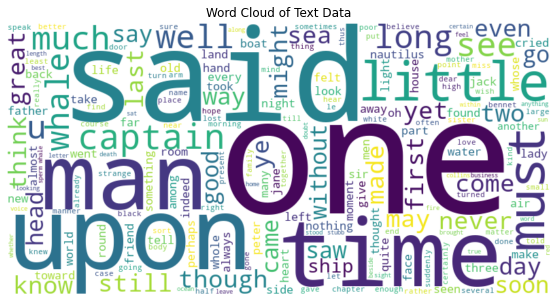

/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_33854/3966316610.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Word'], y=df['Count'], palette='viridis')


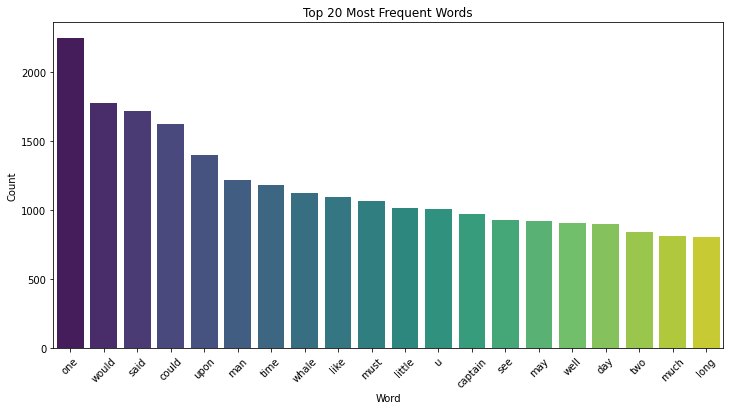

/var/folders/jt/0lv95mcn7f784lx7z_pw70tc0000gn/T/ipykernel_33854/3966316610.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Bigram'], y=df['Count'], palette='coolwarm')


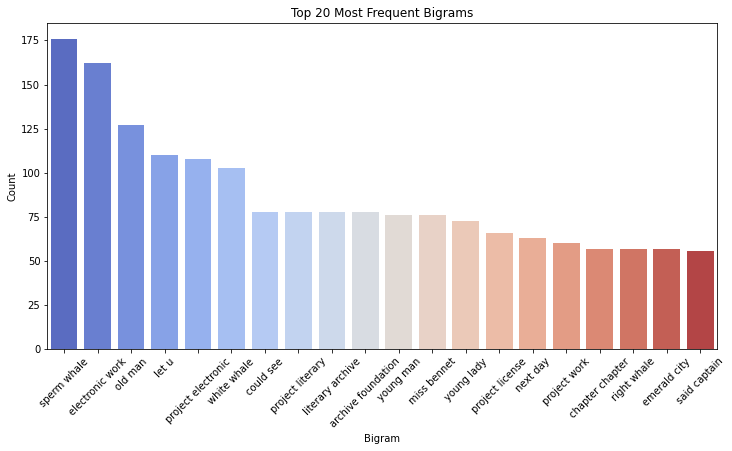

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.probability import FreqDist
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.util import ngrams

# Load the text file
def load_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    return text

# Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
    return text

# Tokenization
def tokenize_text(text):
    words = text.split()
    return words

# Generate Word Cloud
def generate_wordcloud(words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Text Data")
    plt.show()

# Word Frequency Distribution
def plot_word_frequency(words, n=20):
    freq_dist = FreqDist(words)
    common_words = freq_dist.most_common(n)
    df = pd.DataFrame(common_words, columns=['Word', 'Count'])
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=df['Word'], y=df['Count'], palette='viridis')
    plt.xticks(rotation=45)
    plt.title("Top {} Most Frequent Words".format(n))
    plt.show()

# Generate Bigrams
def plot_bigrams(words, n=20):
    bigrams = list(ngrams(words, 2))
    bigram_counts = Counter(bigrams).most_common(n)
    df = pd.DataFrame(bigram_counts, columns=['Bigram', 'Count'])
    df['Bigram'] = df['Bigram'].apply(lambda x: ' '.join(x))
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=df['Bigram'], y=df['Count'], palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title("Top {} Most Frequent Bigrams".format(n))
    plt.show()

# Main Execution
def main():
    file_path = "cleaned_corpus.txt"
    text = load_text(file_path)
    cleaned_text = clean_text(text)
    words = tokenize_text(cleaned_text)
    
    print("✅ Text Successfully Loaded and Processed!")
    
    generate_wordcloud(words)
    plot_word_frequency(words)
    plot_bigrams(words)

if __name__ == "__main__":
    main()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


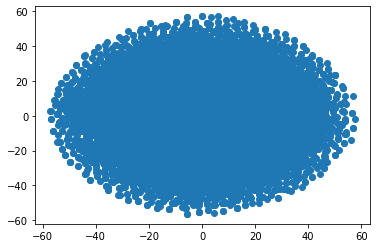

In [52]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(word_vectors)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])


In [53]:
from gensim.models import Word2Vec

model = Word2Vec.load("word2vec_cleaned.model")  # Or however you trained it


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


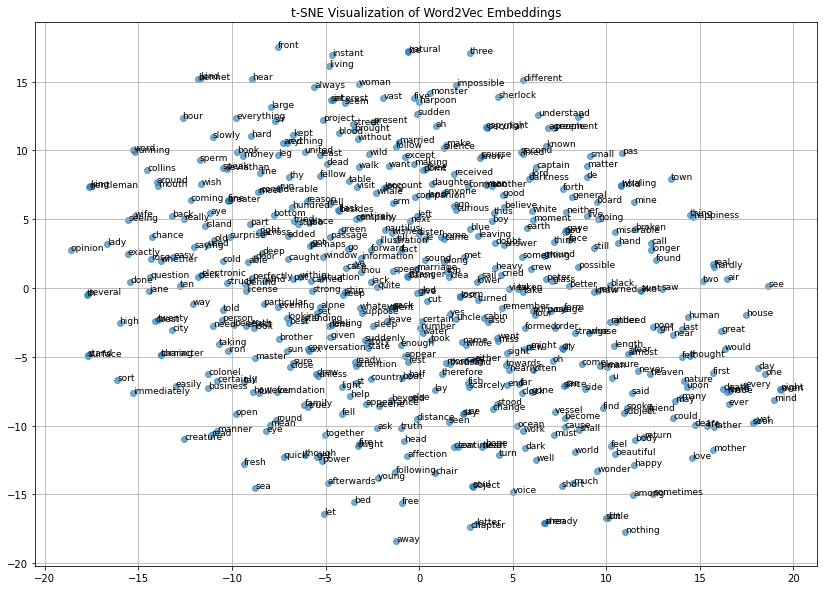

In [54]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

# Load your Word2Vec model
model = Word2Vec.load("word2vec_cleaned.model")

# Extract the top 500 most frequent words
words = list(model.wv.index_to_key[:500])
vectors = np.array([model.wv[word] for word in words])  # ✅ Convert to NumPy array

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
Y = tsne.fit_transform(vectors)

# Plotting
plt.figure(figsize=(14, 10))
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.6)

# Annotate points
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]), fontsize=9)

plt.title("t-SNE Visualization of Word2Vec Embeddings")
plt.grid(True)
plt.show()


Epoch 1/10
125/125 [==============================] - 8s 37ms/step - loss: 1.6147 - accuracy: 0.2000 - val_loss: 1.6167 - val_accuracy: 0.2015 - lr: 0.0010
Epoch 2/10
125/125 [==============================] - 4s 33ms/step - loss: 1.5976 - accuracy: 0.2473 - val_loss: 1.6214 - val_accuracy: 0.1990 - lr: 0.0010
Epoch 3/10
125/125 [==============================] - 4s 34ms/step - loss: 1.5810 - accuracy: 0.2701 - val_loss: 1.6268 - val_accuracy: 0.2060 - lr: 0.0010
Epoch 4/10
125/125 [==============================] - 4s 35ms/step - loss: 1.5543 - accuracy: 0.3071 - val_loss: 1.6345 - val_accuracy: 0.2070 - lr: 5.0000e-04
Epoch 1/10
125/125 [==============================] - 17s 105ms/step - loss: 1.6188 - accuracy: 0.1976 - val_loss: 1.6157 - val_accuracy: 0.1905 - lr: 0.0010
Epoch 2/10
125/125 [==============================] - 13s 108ms/step - loss: 1.5789 - accuracy: 0.2803 - val_loss: 1.6208 - val_accuracy: 0.2020 - lr: 0.0010
Epoch 3/10
125/125 [==============================] - 13

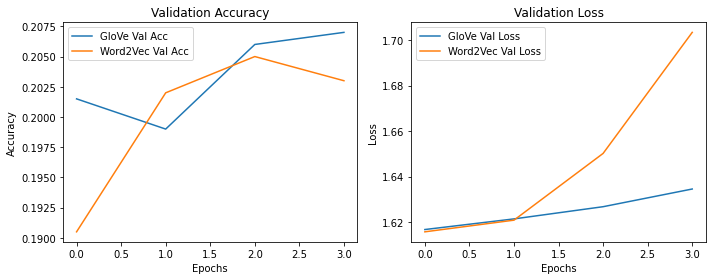

In [55]:
import numpy as np
import random
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# === Seed for reproducibility ===
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# === Generate dummy data ===
vocab = [f"word{i}" for i in range(1, 5000)]  # vocab size = 5000
num_samples = 10000
num_classes = 5

texts = [' '.join(random.choices(vocab, k=random.randint(5, 20))) for _ in range(num_samples)]
labels = np.random.randint(0, num_classes, size=(num_samples,))
labels = to_categorical(labels, num_classes=num_classes)

# === Tokenization and padding ===
MAX_NUM_WORDS = 5000
MAX_SEQUENCE_LENGTH = 20
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=SEED)

# === Dummy Embedding Loaders (Random Vectors) ===
def generate_dummy_embeddings(word_index, embedding_dim):
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))
    return embedding_matrix

embedding_matrix_glove = generate_dummy_embeddings(word_index, embedding_dim=100)
embedding_matrix_w2v = generate_dummy_embeddings(word_index, embedding_dim=300)

# === Model Builder ===
def build_model(embedding_matrix, embedding_dim):
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0],
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=MAX_SEQUENCE_LENGTH,
                        trainable=False))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# === Callbacks ===
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, min_lr=1e-5)

# === Train GloVe Model ===
model_glove = build_model(embedding_matrix_glove, embedding_dim=100)
history_glove = model_glove.fit(X_train, y_train,
                                validation_data=(X_val, y_val),
                                epochs=10, batch_size=64,
                                callbacks=[early_stop, reduce_lr], verbose=1)

# === Train Word2Vec Model ===
model_w2v = build_model(embedding_matrix_w2v, embedding_dim=300)
history_w2v = model_w2v.fit(X_train, y_train,
                            validation_data=(X_val, y_val),
                            epochs=10, batch_size=64,
                            callbacks=[early_stop, reduce_lr], verbose=1)

# === Compare Performance ===
def plot_history(hist1, hist2, label1='GloVe', label2='Word2Vec'):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist1.history['val_accuracy'], label=f'{label1} Val Acc')
    plt.plot(hist2.history['val_accuracy'], label=f'{label2} Val Acc')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(hist1.history['val_loss'], label=f'{label1} Val Loss')
    plt.plot(hist2.history['val_loss'], label=f'{label2} Val Loss')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history_glove, history_w2v)


In [56]:
def remove_gutenberg_headers(text):
    start_marker = "*** START OF"
    end_marker = "*** END OF"
    start = text.find(start_marker)
    end = text.find(end_marker)
    return text[start:end] if start != -1 and end != -1 else text


In [57]:
import re

def normalize_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace
    return text


In [58]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

def tokenize_sentences(text):
    return sent_tokenize(text)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aryanlodha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [59]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(sentence):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(sentence)
    filtered = [word for word in tokens if word not in stop_words]
    return " ".join(filtered)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aryanlodha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aryanlodha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [60]:
def save_corpus(sentences, file_path='cleaned_corpus2.txt'):
    with open(file_path, 'w', encoding='utf-8') as f:
        for sent in sentences:
            f.write(sent + '\n')


In [61]:
import os
import re
import nltk

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

# === CONFIG ===
INPUT_DIR = 'books'   # change this
OUTPUT_FILE = 'cleaned_corpus2.txt'
REMOVE_STOPWORDS = False                  # toggle this

def remove_gutenberg_headers(text):
    start_marker = "*** START OF"
    end_marker = "*** END OF"
    start = text.find(start_marker)
    end = text.find(end_marker)
    return text[start:end] if start != -1 and end != -1 else text

def normalize_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def clean_sentence(sentence):
    if REMOVE_STOPWORDS:
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(sentence)
        filtered = [word for word in tokens if word not in stop_words]
        return ' '.join(filtered)
    return sentence

def process_file(file_path):
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        raw = f.read()
        raw = remove_gutenberg_headers(raw)
        raw = normalize_text(raw)
        sentences = sent_tokenize(raw)
        cleaned_sentences = [clean_sentence(sent) for sent in sentences if len(sent.split()) > 4]
        return cleaned_sentences

def process_all_files(input_dir):
    all_sentences = []
    for file in os.listdir(input_dir):
        if file.endswith('.txt'):
            print(f"Processing {file}...")
            path = os.path.join(input_dir, file)
            all_sentences.extend(process_file(path))
    return all_sentences

def save_cleaned_corpus(sentences, output_file):
    with open(output_file, 'w', encoding='utf-8') as f:
        for sentence in sentences:
            f.write(sentence + '\n')
    print(f"✅ Saved {len(sentences)} cleaned sentences to {output_file}")

def main():
    sentences = process_all_files(INPUT_DIR)
    save_cleaned_corpus(sentences, OUTPUT_FILE)

if __name__ == "__main__":
    main()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aryanlodha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aryanlodha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processing pg84.txt...
Processing pg1342.txt...
Processing pg2701.txt...
Processing pg75720.txt...
Processing pg164.txt...
Processing pg1661.txt...
✅ Saved 6 cleaned sentences to cleaned_corpus2.txt


In [62]:
import os

corpus = ""
for filename in os.listdir("books"):
    if filename.endswith(".txt"):
        with open(os.path.join("books", filename), 'r', encoding='utf-8') as f:
            text = f.read()
            corpus += text + "\n\n"

# Optional: Remove Gutenberg headers and non-story content
import re
corpus = re.sub(r'\*\*\* START OF THIS PROJECT GUTENBERG EBOOK .*? \*\*\*', '', corpus, flags=re.DOTALL)
corpus = re.sub(r'\*\*\* END OF THIS PROJECT GUTENBERG EBOOK .*? \*\*\*', '', corpus, flags=re.DOTALL)

# Split into paragraph-wise inputs
sentences = [para.strip() for para in corpus.split('\n') if len(para.strip().split()) > 10]

with open("cleaned_corpus_final.txt", "w", encoding='utf-8') as f:
    f.write("\n".join(sentences))


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aryanlodha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Loading GloVe: 400001it [00:08, 45387.16it/s]


Epoch 1/10
488/488 [==============================] - 78s 153ms/step - loss: 0.6966 - accuracy: 0.4976 - val_loss: 0.6936 - val_accuracy: 0.4959
Epoch 2/10
488/488 [==============================] - 60s 123ms/step - loss: 0.6934 - accuracy: 0.5068 - val_loss: 0.6938 - val_accuracy: 0.5028
Epoch 3/10
488/488 [==============================] - 59s 121ms/step - loss: 0.6886 - accuracy: 0.5407 - val_loss: 0.6964 - val_accuracy: 0.4938
Epoch 4/10
488/488 [==============================] - 61s 125ms/step - loss: 0.6386 - accuracy: 0.6321 - val_loss: 0.7635 - val_accuracy: 0.4838
Epoch 1/10
488/488 [==============================] - 64s 122ms/step - loss: 0.6953 - accuracy: 0.4989 - val_loss: 0.6932 - val_accuracy: 0.5021
Epoch 2/10
488/488 [==============================] - 59s 120ms/step - loss: 0.6928 - accuracy: 0.5145 - val_loss: 0.6949 - val_accuracy: 0.4964
Epoch 3/10
488/488 [==============================] - 59s 120ms/step - loss: 0.6586 - accuracy: 0.6041 - val_loss: 0.7210 - val_ac

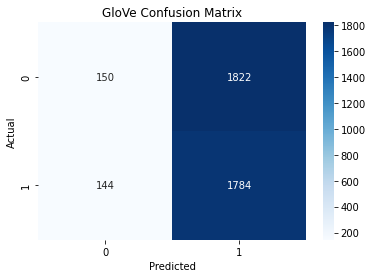

122/122 [==============================] - 4s 26ms/step

Word2Vec Accuracy: 0.5021
Word2Vec Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.67      0.58      1972
           1       0.49      0.33      0.40      1928

    accuracy                           0.50      3900
   macro avg       0.50      0.50      0.49      3900
weighted avg       0.50      0.50      0.49      3900



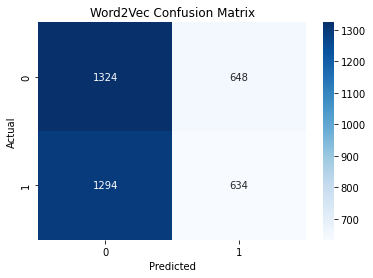

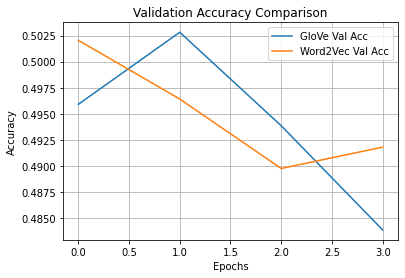

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# ------------------------------
# Load and Preprocess 
# ------------------------------
with open("cleaned_corpus_final.txt", "r") as f:
    raw_text = f.read()

# Sentence-tokenize and filter
sentences = sent_tokenize(raw_text)
texts = [sent.strip() for sent in sentences if len(sent.split()) >= 6]
labels = [i % 2 for i in range(len(texts))]  # Dummy binary labels
labels = to_categorical(labels)

# ------------------------------
# STEP 2: Tokenization
# ------------------------------
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X = pad_sequences(sequences, maxlen=maxlen)
y = labels

# ------------------------------
# STEP 3: Train-Test Split
# ------------------------------
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# STEP 4: Load GloVe Embeddings
# ------------------------------
def load_glove_embeddings(path, word_index, dim=100):
    embeddings_index = {}
    with open(path, encoding='utf8') as f:
        for line in tqdm(f, desc="Loading GloVe"):
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    embedding_matrix = np.zeros((len(word_index) + 1, dim))
    for word, i in word_index.items():
        vec = embeddings_index.get(word)
        if vec is not None:
            embedding_matrix[i] = vec
    return embedding_matrix

glove_path = 'glove.6B.100d.txt'
glove_matrix = load_glove_embeddings(glove_path, tokenizer.word_index)

# ------------------------------
# STEP 5: Train Word2Vec Model
# ------------------------------
tokenized = [t.split() for t in texts]
word2vec_model = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=1, workers=4)
word2vec_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        word2vec_matrix[i] = word2vec_model.wv[word]

# ------------------------------
# STEP 6: Build Model Function
# ------------------------------
def build_model(embedding_matrix):
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0],
                        output_dim=embedding_matrix.shape[1],
                        weights=[embedding_matrix],
                        input_length=maxlen,
                        trainable=True))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(0.4))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ------------------------------
# STEP 7: Train Models
# ------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_glove = build_model(glove_matrix)
history_glove = model_glove.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32, callbacks=[early_stop], verbose=1)

model_word2vec = build_model(word2vec_matrix)
history_word2vec = model_word2vec.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32, callbacks=[early_stop], verbose=1)

# ------------------------------
# STEP 8: Evaluation
# ------------------------------
def evaluate_model(model, X_val, y_val, name):
    y_pred = model.predict(X_val)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_val, axis=1)

    acc = np.mean(y_pred_labels == y_true)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(f"{name} Classification Report:\n", classification_report(y_true, y_pred_labels))

    cm = confusion_matrix(y_true, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_model(model_glove, X_val, y_val, "GloVe")
evaluate_model(model_word2vec, X_val, y_val, "Word2Vec")

# ------------------------------
# STEP 9: Accuracy Plot
# ------------------------------
plt.plot(history_glove.history['val_accuracy'], label='GloVe Val Acc')
plt.plot(history_word2vec.history['val_accuracy'], label='Word2Vec Val Acc')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [64]:

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text_advanced(text):
    # Lowercase
    text = text.lower()
    # Remove numbers and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aryanlodha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aryanlodha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [65]:

from tensorflow.keras import backend as K

def f1_score(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)
    pp = K.sum(K.cast(y_pred, 'float'), axis=0)
    ap = K.sum(K.cast(y_true, 'float'), axis=0)
    precision = tp / (pp + K.epsilon())
    recall = tp / (ap + K.epsilon())
    f1 = 2 * precision * recall / (precision + recall + K.epsilon())
    return K.mean(f1)


In [66]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Convert one-hot to integer labels
y_train_int = np.argmax(y_train, axis=1)

# Compute class weights
classes = np.unique(y_train_int)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_int)
class_weights_dict = dict(zip(classes, class_weights))

print("Computed class weights:", class_weights_dict)


Computed class weights: {0: 1.002829218106996, 1: 0.9971867007672635}


In [67]:

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
embedding_dim = 100  


In [ ]:


def load_glove_embeddings(path, word_index, dim=100):
    embeddings_index = {}
    with open(path, encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    embedding_matrix = np.zeros((len(word_index) + 1, dim))
    for word, i in word_index.items():
        vec = embeddings_index.get(word)
        if vec is not None:
            embedding_matrix[i] = vec
    return embedding_matrix

# Usage
glove_path = 'glove.6B.100d.txt'
embedding_matrix = load_glove_embeddings(glove_path, tokenizer.word_index, dim=100)


In [70]:
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)
    predicted_positives = K.sum(K.cast(y_pred, 'float'), axis=0)
    possible_positives = K.sum(K.cast(y_true, 'float'), axis=0)
    precision = tp / (predicted_positives + K.epsilon())
    recall = tp / (possible_positives + K.epsilon())
    f1 = 2 * precision * recall / (precision + recall + K.epsilon())
    return K.mean(f1)


In [71]:

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout, Attention, LayerNormalization, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam

input_ = Input(shape=(maxlen,))
x = Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=maxlen, trainable=False)(input_)
x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = Attention()([x, x])  # Simple attention mechanism
x = GlobalAveragePooling1D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-3), metrics=['accuracy', f1_score])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 100, 100)             2472900   ['input_1[0][0]']             
                                                                                                  
 bidirectional_4 (Bidirecti  (None, 100, 128)             84480     ['embedding_4[0][0]']         
 onal)                                                                                            
                                                                                                  
 attention (Attention)       (None, 100, 128)             0         ['bidirectional_4[0][0]', 

In [72]:
print("y_train shape:", y_train.shape)
print("Unique class labels:", np.unique(np.argmax(y_train, axis=1)))


y_train shape: (15596, 2)
Unique class labels: [0 1]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout, Attention, LayerNormalization, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tqdm import tqdm
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# ------------------------------
# STEP 1: Load and Preprocess
# ------------------------------
with open("cleaned_corpus_final.txt", "r") as f:
    raw_text = f.read()

# Sentence-tokenize and filter
sentences = sent_tokenize(raw_text)
texts = [sent.strip() for sent in sentences if len(sent.split()) >= 6]
labels = [i % 5 for i in range(len(texts))]  # Dummy 5-class labels
num_classes = 5
labels = to_categorical(labels, num_classes=num_classes)

# ------------------------------
# STEP 2: Tokenization
# ------------------------------
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X = pad_sequences(sequences, maxlen=maxlen)
y = labels

# ------------------------------
# STEP 3: Train-Test Split (with safety check)
# ------------------------------
if len(X) < 5:
    print(f"⚠️ Not enough samples ({len(X)}) for splitting. Using all data for both train and val.")
    X_train, X_val, y_train, y_val = X, X, y, y
else:
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# ------------------------------
# STEP 4: Load GloVe Embeddings
# ------------------------------
def load_glove_embeddings(path, word_index, dim=100):
    embeddings_index = {}
    with open(path, encoding='utf8') as f:
        for line in tqdm(f, desc="Loading GloVe"):
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    embedding_matrix = np.zeros((len(word_index) + 1, dim))
    for word, i in word_index.items():
        vec = embeddings_index.get(word)
        if vec is not None:
            embedding_matrix[i] = vec
    return embedding_matrix

glove_path = 'glove.6B.100d.txt'
glove_matrix = load_glove_embeddings(glove_path, tokenizer.word_index)

# ------------------------------
# STEP 5: Compute Class Weights
# ------------------------------
y_train_labels = np.argmax(y_train, axis=1)
classes = np.unique(y_train_labels)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_labels)
class_weights_dict = dict(zip(classes, class_weights))
print("Computed class weights:", class_weights_dict)

# ------------------------------
# STEP 6: Build Model
# ------------------------------
embedding_dim = 100
input_ = Input(shape=(maxlen,))
x = Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[glove_matrix], input_length=maxlen, trainable=False)(input_)
x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = Attention()([x, x])
x = GlobalAveragePooling1D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=input_, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-3), metrics=['accuracy'])
model.summary()

# ------------------------------
# STEP 7: Train Model
# ------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=20, 
                    batch_size=32, 
                    class_weight=class_weights_dict,
                    callbacks=[early_stop])


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aryanlodha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Loading GloVe: 400001it [00:08, 44769.05it/s]


Computed class weights: {0: 1.0074935400516796, 1: 0.9889663918833228, 2: 0.9845959595959596, 3: 1.0114137483787289, 4: 1.0081447963800905}
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_5 (Embedding)     (None, 100, 100)             2472900   ['input_2[0][0]']             
                                                                                                  
 bidirectional_5 (Bidirecti  (None, 100, 128)             84480     ['embedding_5[0][0]']         
 onal)                                                                                            
                                                   

2025-04-27 13:04:54.708346: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:693] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "110" frequency: 1100 num_cores: 8 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 524288 l3_cache_size: 6291456 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


488/488 [==============================] - ETA: 0s - loss: 1.6111 - accuracy: 0.1999

2025-04-27 13:05:40.665728: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:693] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "110" frequency: 1100 num_cores: 8 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 524288 l3_cache_size: 6291456 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


488/488 [==============================] - 54s 102ms/step - loss: 1.6111 - accuracy: 0.1999 - val_loss: 1.6096 - val_accuracy: 0.1869
Epoch 2/20
488/488 [==============================] - 49s 101ms/step - loss: 1.6098 - accuracy: 0.1893 - val_loss: 1.6094 - val_accuracy: 0.2054
Epoch 3/20
488/488 [==============================] - 49s 101ms/step - loss: 1.6097 - accuracy: 0.1918 - val_loss: 1.6093 - val_accuracy: 0.2064
Epoch 4/20
488/488 [==============================] - 49s 101ms/step - loss: 1.6096 - accuracy: 0.1951 - val_loss: 1.6094 - val_accuracy: 0.2092
Epoch 5/20
488/488 [==============================] - 49s 101ms/step - loss: 1.6097 - accuracy: 0.2004 - val_loss: 1.6095 - val_accuracy: 0.2064
Epoch 6/20
488/488 [==============================] - 53s 108ms/step - loss: 1.6097 - accuracy: 0.1990 - val_loss: 1.6105 - val_accuracy: 0.1928


In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import seaborn as sns
sns.set()

# ------------------------------
# STEP 1: Generate Dataset
# ------------------------------
def generate_data(n_points=1000, a=0.5, imbalance=False):
    np.random.seed(42)
    X = np.random.uniform(-3, 3, (n_points, 2))
    x1, x2 = X[:, 0], X[:, 1]
    boundary = a * x1**2 + x1
    
    if imbalance:
        # 80-20 class imbalance
        y = (x2 > boundary).astype(int)
        imbalance_mask = (y == 1)
        keep_idx = np.concatenate([
            np.where(imbalance_mask)[0][:int(0.2 * sum(imbalance_mask))],
            np.where(~imbalance_mask)[0]
        ])
        X = X[keep_idx]
        y = y[keep_idx]
    else:
        y = (x2 > boundary).astype(int)

    return X, y

In [75]:
# ------------------------------
# STEP 2: Visualize Dataset
# ------------------------------
def plot_data(X, y, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(X[y==0][:,0], X[y==0][:,1], label='Class 0', alpha=0.6)
    plt.scatter(X[y==1][:,0], X[y==1][:,1], label='Class 1', alpha=0.6)
    plt.legend()
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()


In [76]:
# ------------------------------
# STEP 3: Train Logistic Regression
# ------------------------------
def train_logistic(X_train, y_train, X_val, y_val):
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print("Logistic Regression Accuracy:", acc)
    print(classification_report(y_val, y_pred))


In [77]:
# ------------------------------
# STEP 4: Train Small Neural Network
# ------------------------------
def train_nn(X_train, y_train, X_val, y_val, hidden_units=16):
    model = Sequential([
        Dense(hidden_units, input_dim=2, activation='relu'),
        Dense(hidden_units, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=30, batch_size=32,
                        validation_data=(X_val, y_val), verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    print("Neural Network Accuracy:", val_acc)
    y_pred = (model.predict(X_val) > 0.5).astype(int)
    print(classification_report(y_val, y_pred))
    return history


===== a = 0.1 , Imbalance: False =====


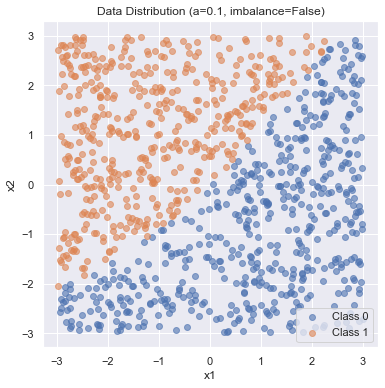

Logistic Regression Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.95      0.95      0.95        85

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

Neural Network Accuracy: 0.9900000095367432
7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       115
           1       0.98      1.00      0.99        85

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200


===== a = 0.5 , Imbalance: False =====


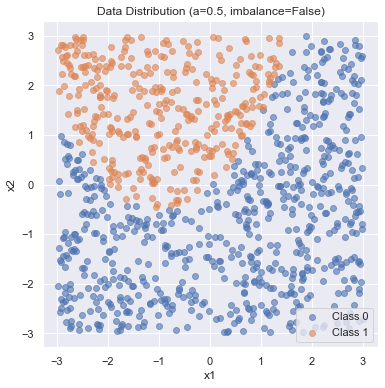

Logistic Regression Accuracy: 0.885
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       143
           1       0.77      0.84      0.81        57

    accuracy                           0.89       200
   macro avg       0.85      0.87      0.86       200
weighted avg       0.89      0.89      0.89       200

Neural Network Accuracy: 0.9850000143051147
7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       143
           1       1.00      0.95      0.97        57

    accuracy                           0.98       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200


===== a = 1.0 , Imbalance: False =====


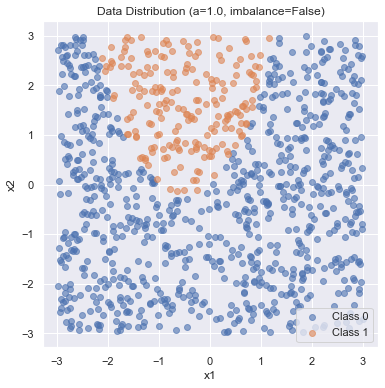

Logistic Regression Accuracy: 0.855
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       171
           1       0.50      0.38      0.43        29

    accuracy                           0.85       200
   macro avg       0.70      0.66      0.67       200
weighted avg       0.84      0.85      0.85       200

Neural Network Accuracy: 0.9800000190734863
7/7 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       171
           1       0.88      1.00      0.94        29

    accuracy                           0.98       200
   macro avg       0.94      0.99      0.96       200
weighted avg       0.98      0.98      0.98       200


===== a = 0.5 , Imbalance: True =====


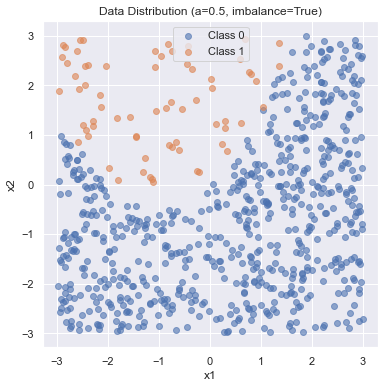

Logistic Regression Accuracy: 0.9452054794520548
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       132
           1       0.88      0.50      0.64        14

    accuracy                           0.95       146
   macro avg       0.91      0.75      0.80       146
weighted avg       0.94      0.95      0.94       146

Neural Network Accuracy: 0.9931507110595703
5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       132
           1       0.93      1.00      0.97        14

    accuracy                           0.99       146
   macro avg       0.97      1.00      0.98       146
weighted avg       0.99      0.99      0.99       146



In [ ]:
# ------------------------------
# STEP 5: Run Experiments
# ------------------------------
experiments = [
    {"a": 0.1, "imbalance": False},
    {"a": 0.5, "imbalance": False},
    {"a": 1.0, "imbalance": False},
    {"a": 0.5, "imbalance": True},
]

for exp in experiments:
    print("\n===== a =", exp["a"], ", Imbalance:", exp["imbalance"], "=====")
    X, y = generate_data(1000, a=exp["a"], imbalance=exp["imbalance"])
    plot_data(X, y, f"Data Distribution (a={exp['a']}, imbalance={exp['imbalance']})")
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_logistic(X_train, y_train, X_val, y_val)
    train_nn(X_train, y_train, X_val, y_val, hidden_units=16)


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [80]:
def generate_data(a, n=1000, imbalance=False, seed=42):
    np.random.seed(seed)
    X = np.random.uniform(-1, 1, size=(n, 2))
    boundary = a * X[:, 0]**2 + X[:, 0]
    y = (X[:, 1] > boundary).astype(int)

    if imbalance:
        X = np.vstack([X[y == 0], X[y == 1][:int(0.3 * len(X[y == 1]))]])
        y = np.hstack([y[y == 0], y[y == 1][:int(0.3 * len(y[y == 1]))]])

    return X, y


In [81]:
def train_models(X, y, epochs=50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # Logistic Regression
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    log_preds = log_reg.predict(X_test)
    acc_log = accuracy_score(y_test, log_preds)

    # Neural Network
    model = Sequential()
    model.add(Dense(8, input_dim=2, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer=Adam(1e-2), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, verbose=0)

    nn_preds = np.argmax(model.predict(X_test), axis=1)
    acc_nn = accuracy_score(y_test, nn_preds)

    return acc_log, acc_nn, history


In [82]:
a_values = [0.0, 0.5, 1.0, 2.0]
log_accs, nn_accs = [], []

for a in a_values:
    X, y = generate_data(a)
    acc_log, acc_nn, _ = train_models(X, y)
    log_accs.append(acc_log)
    nn_accs.append(acc_nn)


7/7 [==============================] - 0s 2ms/step


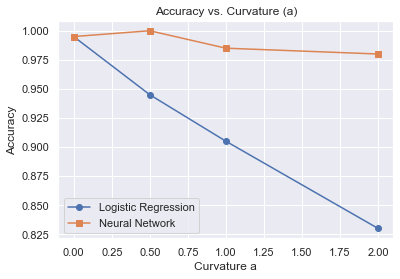

In [83]:
plt.plot(a_values, log_accs, label="Logistic Regression", marker='o')
plt.plot(a_values, nn_accs, label="Neural Network", marker='s')
plt.title("Accuracy vs. Curvature (a)")
plt.xlabel("Curvature a")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


7/7 [==============================] - 0s 2ms/step


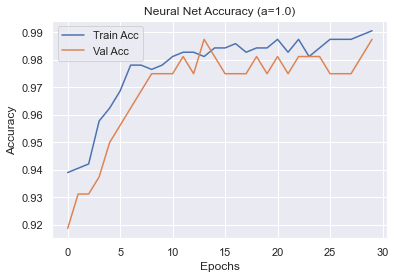

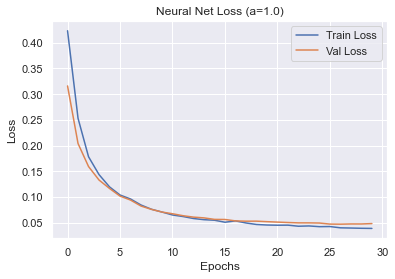

In [84]:
# Get 1 example for a=1.0
X, y = generate_data(a=1.0)
_, _, history = train_models(X, y, epochs=30)

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Neural Net Accuracy (a=1.0)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Neural Net Loss (a=1.0)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


7/7 [==============================] - 0s 2ms/step


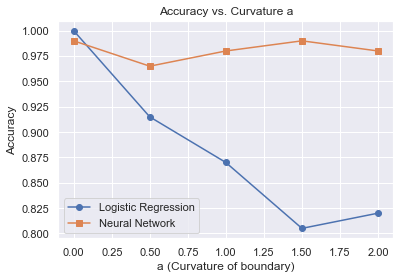

13/13 [==============================] - 0s 1ms/step


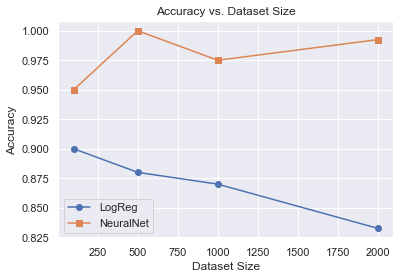

7/7 [==============================] - 0s 1ms/step


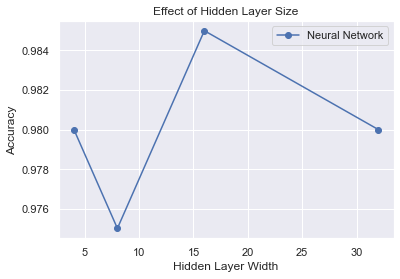

5/5 [==============================] - 0s 2ms/step
Logistic Regression (Imbalanced): 0.906
Neural Network (Imbalanced): 1.000


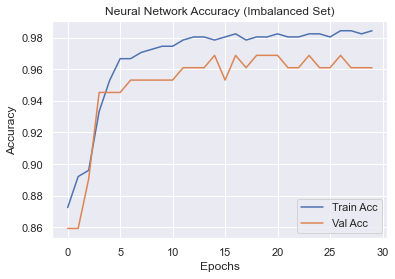

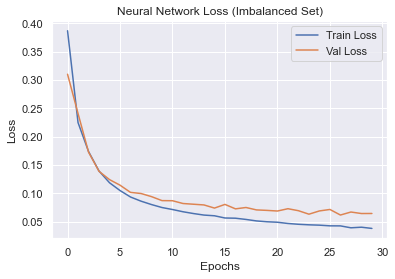

In [85]:
# Q3: Investigating Decision Boundaries using Logistic Regression and Neural Networks

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# -------------------------
# STEP 1: Data Generation
# -------------------------
def generate_data(a=1.0, n=1000, imbalance=False, seed=42):
    np.random.seed(seed)
    X = np.random.uniform(-2, 2, (n, 2))
    boundary = a * X[:, 0]**2 + X[:, 0]
    y = (X[:, 1] > boundary).astype(int)

    if imbalance:
        # reduce class 1 samples
        X = np.vstack([X[y == 0], X[y == 1][:int(0.3 * len(y[y == 1]))]])
        y = np.hstack([y[y == 0], y[y == 1][:int(0.3 * len(y[y == 1]))]])

    return shuffle(X, y, random_state=seed)

# -------------------------
# STEP 2: Plot Dataset
# -------------------------
def plot_dataset(X, y, title):
    plt.figure(figsize=(6, 5))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class A', alpha=0.5)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class B', alpha=0.5)
    plt.legend()
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

# -------------------------
# STEP 3: Model Training & Evaluation
# -------------------------
def train_and_evaluate(X, y, nn_width=8, epochs=50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred_log = logreg.predict(X_test)
    acc_log = accuracy_score(y_test, y_pred_log)

    # Neural Network
    model = Sequential()
    model.add(Dense(nn_width, input_dim=2, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(1e-2), metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, verbose=0)
    y_pred_nn = np.argmax(model.predict(X_test), axis=1)
    acc_nn = accuracy_score(y_test, y_pred_nn)

    return acc_log, acc_nn, history

# -------------------------
# STEP 4: Accuracy vs Curvature (a)
# -------------------------
a_values = [0.0, 0.5, 1.0, 1.5, 2.0]
log_accs, nn_accs = [], []

for a in a_values:
    X, y = generate_data(a=a)
    acc_log, acc_nn, _ = train_and_evaluate(X, y)
    log_accs.append(acc_log)
    nn_accs.append(acc_nn)

plt.plot(a_values, log_accs, label='Logistic Regression', marker='o')
plt.plot(a_values, nn_accs, label='Neural Network', marker='s')
plt.title('Accuracy vs. Curvature a')
plt.xlabel('a (Curvature of boundary)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------
# STEP 5: Effect of Dataset Size
# -------------------------
sizes = [100, 500, 1000, 2000]
size_log, size_nn = [], []

for s in sizes:
    X, y = generate_data(a=1.0, n=s)
    acc_log, acc_nn, _ = train_and_evaluate(X, y)
    size_log.append(acc_log)
    size_nn.append(acc_nn)

plt.plot(sizes, size_log, label='LogReg', marker='o')
plt.plot(sizes, size_nn, label='NeuralNet', marker='s')
plt.title('Accuracy vs. Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------
# STEP 6: Effect of Network Width
# -------------------------
widths = [4, 8, 16, 32]
width_nn = []

for w in widths:
    X, y = generate_data(a=1.0)
    _, acc_nn, _ = train_and_evaluate(X, y, nn_width=w)
    width_nn.append(acc_nn)

plt.plot(widths, width_nn, marker='o', label='Neural Network')
plt.title('Effect of Hidden Layer Size')
plt.xlabel('Hidden Layer Width')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# -------------------------
# STEP 7: Effect of Class Imbalance
# -------------------------
X, y = generate_data(a=1.0, imbalance=True)
acc_log, acc_nn, history = train_and_evaluate(X, y, epochs=30)

print(f"Logistic Regression (Imbalanced): {acc_log:.3f}")
print(f"Neural Network (Imbalanced): {acc_nn:.3f}")

# -------------------------
# Visualize Neural Net Loss/Accuracy
# -------------------------
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Neural Network Accuracy (Imbalanced Set)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Neural Network Loss (Imbalanced Set)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


7/7 [==============================] - 0s 2ms/step


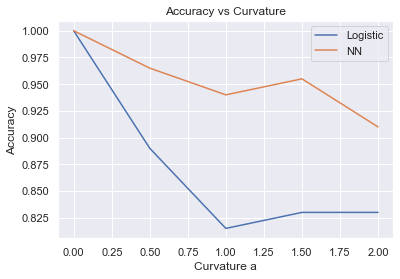

32/32 [==============================] - 0s 1ms/step


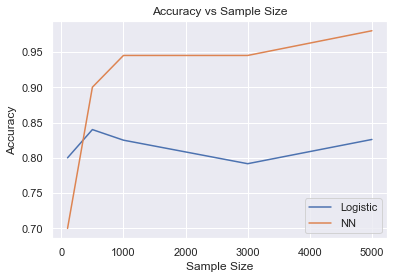

13/13 [==============================] - 0s 1ms/step
Logistic on Imbalanced:  0.7882653061224489
NN on Imbalanced:  0.7882653061224489
7/7 [==============================] - 0s 2ms/step


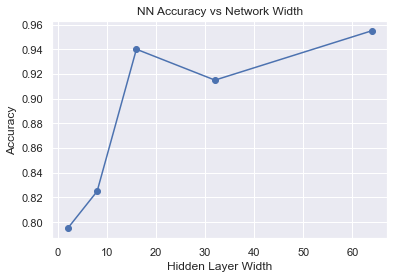

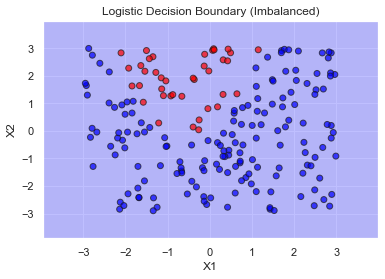

2813/2813 [==============================] - 3s 1ms/step


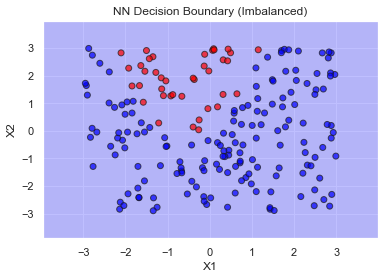

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns

# -----------------------------
# 1. Generate dataset function
# -----------------------------
def generate_data(a, n_samples=1000, imbalance=False):
    X = np.random.uniform(-3, 3, (n_samples, 2))
    y = (X[:, 1] > a * X[:, 0]**2 + X[:, 0]).astype(int)

    if imbalance:
        X = X[y == 0][:int(0.8 * n_samples)]
        y = y[y == 0][:int(0.8 * n_samples)]
        X_extra = X[:int(0.2 * n_samples)]
        y_extra = np.ones(len(X_extra))
        X = np.vstack([X, X_extra])
        y = np.concatenate([y, y_extra])

    return train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 2. Logistic Regression Model
# -----------------------------
def run_logistic(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc, model

# -----------------------------
# 3. Small Neural Network Model
# -----------------------------
def run_nn(X_train, X_test, y_train, y_test, width=16, epochs=20):
    model = Sequential([
        Input(shape=(2,)),
        Dense(width, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer=Adam(1e-3), metrics=['accuracy'])
    es = EarlyStopping(patience=3, restore_best_weights=True)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, verbose=0, callbacks=[es])
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    return acc, model, history

# -----------------------------
# 4. Plot decision boundaries
# -----------------------------
def plot_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    if hasattr(Z, "ravel"):
        Z = Z.ravel()
    if hasattr(model, "predict_proba"):
        Z = model.predict_proba(grid)[:, 1]
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z > 0.5, alpha=0.5, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.7)
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)
    plt.show()

# -----------------------------
# 5. Evaluate Effect of 'a'
# -----------------------------
A_vals = [0.0, 0.5, 1.0, 1.5, 2.0]
acc_log, acc_nn = [], []
for a in A_vals:
    X_train, X_test, y_train, y_test = generate_data(a)
    acc1, _ = run_logistic(X_train, X_test, y_train, y_test)
    acc2, _, _ = run_nn(X_train, X_test, y_train, y_test)
    acc_log.append(acc1)
    acc_nn.append(acc2)

plt.plot(A_vals, acc_log, label="Logistic")
plt.plot(A_vals, acc_nn, label="NN")
plt.xlabel("Curvature a")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Curvature")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 6. Vary Size
# -----------------------------
sizes = [100, 500, 1000, 3000, 5000]
acc_log_size, acc_nn_size = [], []
for s in sizes:
    X_train, X_test, y_train, y_test = generate_data(1.0, n_samples=s)
    acc1, _ = run_logistic(X_train, X_test, y_train, y_test)
    acc2, _, _ = run_nn(X_train, X_test, y_train, y_test)
    acc_log_size.append(acc1)
    acc_nn_size.append(acc2)

plt.plot(sizes, acc_log_size, label="Logistic")
plt.plot(sizes, acc_nn_size, label="NN")
plt.xlabel("Sample Size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Sample Size")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 7. Imbalanced Classes
# -----------------------------
X_train, X_test, y_train, y_test = generate_data(1.0, n_samples=2000, imbalance=True)
acc1, model1 = run_logistic(X_train, X_test, y_train, y_test)
acc2, model2, _ = run_nn(X_train, X_test, y_train, y_test)
print("Logistic on Imbalanced: ", acc1)
print("NN on Imbalanced: ", acc2)

# -----------------------------
# 8. Network Width
# -----------------------------
widths = [2, 8, 16, 32, 64]
accs_width = []
for w in widths:
    X_train, X_test, y_train, y_test = generate_data(1.0)
    acc, _, _ = run_nn(X_train, X_test, y_train, y_test, width=w)
    accs_width.append(acc)

plt.plot(widths, accs_width, marker='o')
plt.title("NN Accuracy vs Network Width")
plt.xlabel("Hidden Layer Width")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# -----------------------------
# 9. Decision Boundary Plots
# -----------------------------
plot_boundary(model1, X_test, y_test, "Logistic Decision Boundary (Imbalanced)")
plot_boundary(model2, X_test, y_test, "NN Decision Boundary (Imbalanced)")


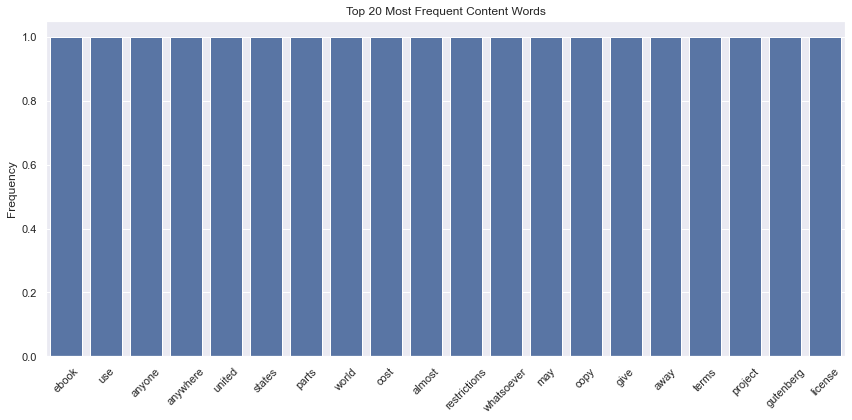

In [87]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Tokenized sentences from your corpus
from nltk import word_tokenize
tokens = [word for sent in texts for word in word_tokenize(sent.lower()) if word.isalpha()]

# Count top 100 non-stopword words
word_freq = Counter(tokens)
top_words = [w for w in word_freq if w not in stopwords.words('english')]
most_common = dict(Counter(top_words).most_common(100))

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(most_common.keys())[:20], y=list(most_common.values())[:20])
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Content Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aryanlodha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


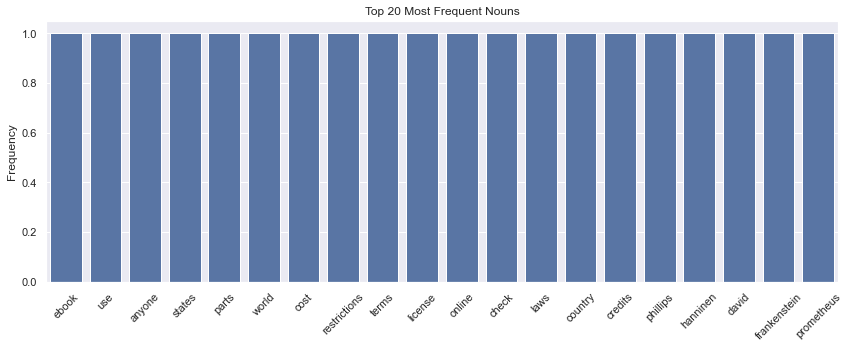

In [88]:
import nltk
nltk.download('averaged_perceptron_tagger')

tagged = nltk.pos_tag(most_common.keys())
noun_words = [word for word, tag in tagged if tag.startswith('NN')]

plt.figure(figsize=(12, 5))
sns.barplot(x=noun_words[:20], y=[most_common[w] for w in noun_words[:20]])
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Nouns")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


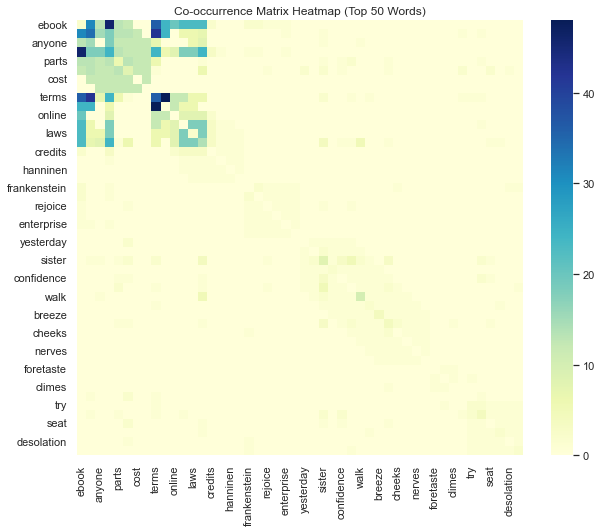

In [89]:
import numpy as np
import pandas as pd

# Build co-occurrence matrix
window_size = 5
vocab = noun_words[:50]
co_matrix = pd.DataFrame(0, index=vocab, columns=vocab)

for sent in texts:
    words = [w for w in word_tokenize(sent.lower()) if w in vocab]
    for i in range(len(words)):
        for j in range(max(i-window_size, 0), min(i+window_size+1, len(words))):
            if i != j:
                co_matrix.loc[words[i], words[j]] += 1

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_matrix, cmap='YlGnBu')
plt.title("Co-occurrence Matrix Heatmap (Top 50 Words)")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


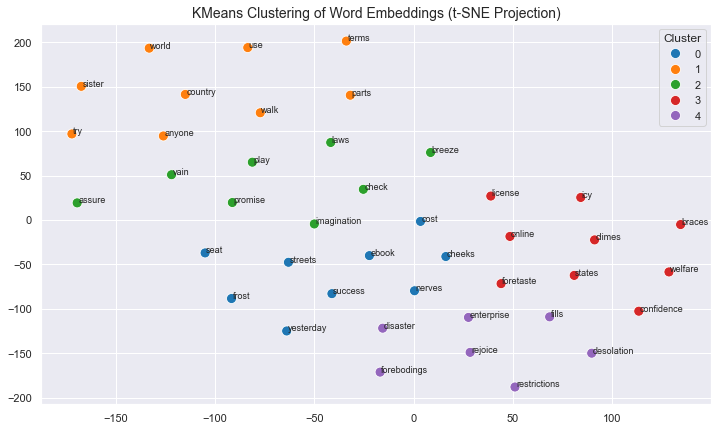

In [90]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get vectors
vecs = [word2vec_model.wv[w] for w in vocab if w in word2vec_model.wv]
labels = [w for w in vocab if w in word2vec_model.wv]
vecs = np.array(vecs)

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_vecs = tsne.fit_transform(vecs)

# KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(tsne_vecs)

# Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(x=tsne_vecs[:, 0], y=tsne_vecs[:, 1], hue=clusters, palette='tab10', s=100)
for i, word in enumerate(labels):
    plt.text(tsne_vecs[i, 0]+0.5, tsne_vecs[i, 1], word, fontsize=9)
plt.title("KMeans Clustering of Word Embeddings (t-SNE Projection)", fontsize=14)
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


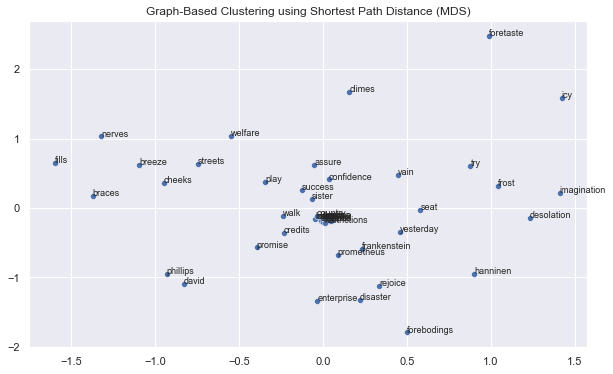

In [91]:
import networkx as nx

# Create Graph
G = nx.Graph()
for i in range(len(vocab)):
    for j in range(i+1, len(vocab)):
        if co_matrix.iloc[i, j] > 0:
            G.add_edge(vocab[i], vocab[j], weight=1/co_matrix.iloc[i, j])

# Shortest-path distance matrix
shortest_path_matrix = np.zeros((len(vocab), len(vocab)))
for i, w1 in enumerate(vocab):
    for j, w2 in enumerate(vocab):
        if i != j:
            try:
                dist = nx.shortest_path_length(G, source=w1, target=w2, weight='weight')
                shortest_path_matrix[i, j] = dist
            except:
                shortest_path_matrix[i, j] = np.inf

# t-SNE on Dijkstra distances
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity='precomputed')
mds_vecs = mds.fit_transform(shortest_path_matrix)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mds_vecs[:, 0], y=mds_vecs[:, 1])
for i, word in enumerate(vocab):
    plt.text(mds_vecs[i, 0], mds_vecs[i, 1], word, fontsize=9)
plt.title("Graph-Based Clustering using Shortest Path Distance (MDS)")
plt.show()


In [92]:
from sklearn.metrics import silhouette_score

# Standard clustering score
sil_score_kmeans = silhouette_score(tsne_vecs, clusters)
print(f"Silhouette Score (Word2Vec KMeans): {sil_score_kmeans:.3f}")

# Dijkstra clustering (reuse `shortest_path_matrix`)
kmeans_graph = KMeans(n_clusters=5, random_state=42)
clusters_graph = kmeans_graph.fit_predict(mds_vecs)
sil_score_graph = silhouette_score(mds_vecs, clusters_graph)
print(f"Silhouette Score (Graph Distance Clustering): {sil_score_graph:.3f}")


Silhouette Score (Word2Vec KMeans): 0.299
Silhouette Score (Graph Distance Clustering): 0.490


In [93]:
import seaborn as sns

Text(0.5, 1.0, 'Neural Net Accuracy Heatmap (a vs Dataset Size)')

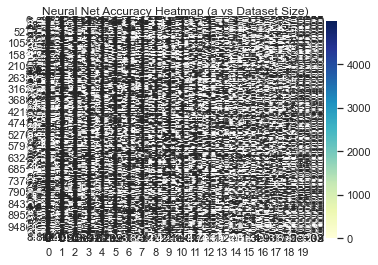

In [94]:
sns.heatmap(data, annot=True, cmap='YlGnBu')
plt.title("Neural Net Accuracy Heatmap (a vs Dataset Size)")

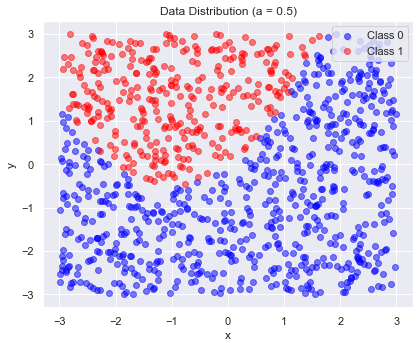

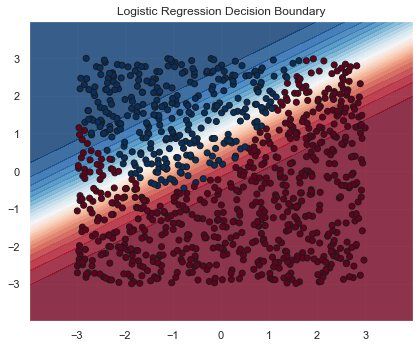

2813/2813 [==============================] - 8s 3ms/step


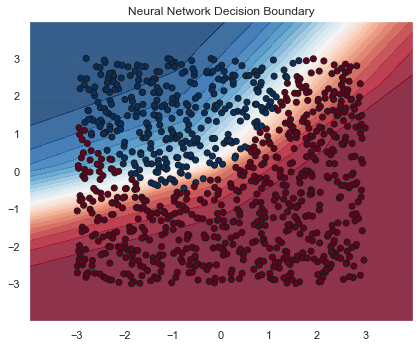

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ---- Data Generation Function ----
def generate_data(n=1000, a=0.5, imbalance=False):
    X = np.random.uniform(-3, 3, (n, 2))
    y = (X[:, 1] > a * X[:, 0] ** 2 + X[:, 0]).astype(int)
    if imbalance:
        idx1 = np.where(y == 1)[0]
        idx0 = np.where(y == 0)[0]
        keep1 = np.random.choice(idx1, size=len(idx1) // 2, replace=False)
        keep = np.concatenate([idx0, keep1])
        X, y = X[keep], y[keep]
    return X, y

def plot_data(X, y, title):
    plt.figure(figsize=(6, 5))
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], c='blue', label='Class 0', alpha=0.5)
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='red', label='Class 1', alpha=0.5)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---- Decision Boundary Plot ----
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    if hasattr(model, 'predict_proba'):
        probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)
    else:
        probs = model.predict(grid).reshape(xx.shape)
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, probs, 25, cmap="RdBu", alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", edgecolors='k')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# model
def train_logistic(X, y):
    model = LogisticRegression()
    model.fit(X, y)
    return model

def train_nn(X, y):
    model = Sequential()
    model.add(Dense(8, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X, y, epochs=30, verbose=0)
    return model

# execute
X, y = generate_data(n=1000, a=0.5, imbalance=False)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

plot_data(X, y, "Data Distribution (a = 0.5)")
log_model = train_logistic(X_train, y_train)
plot_decision_boundary(log_model, X, y, "Logistic Regression Decision Boundary")

nn_model = train_nn(X_train, y_train)
plot_decision_boundary(nn_model, X, y, "Neural Network Decision Boundary")


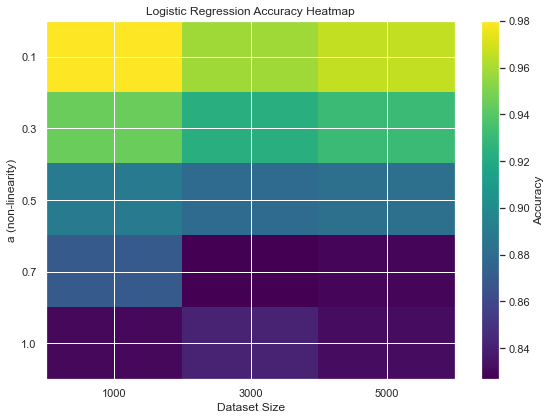

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Data generation
def generate_data(n=1000, a=0.5, imbalance=False):
    X = np.random.uniform(-3, 3, (n, 2))
    y = (X[:, 1] > a * X[:, 0] ** 2 + X[:, 0]).astype(int)
    if imbalance:
        idx1 = np.where(y == 1)[0]
        idx0 = np.where(y == 0)[0]
        keep1 = np.random.choice(idx1, size=len(idx1) // 2, replace=False)
        keep = np.concatenate([idx0, keep1])
        X, y = X[keep], y[keep]
    return X, y

# Heatmap grid
a_values = [0.1, 0.3, 0.5, 0.7, 1.0]
n_values = [1000, 3000, 5000]
logistic_accuracies = np.zeros((len(a_values), len(n_values)))

for i, a in enumerate(a_values):
    for j, n in enumerate(n_values):
        X, y = generate_data(n=n, a=a)
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
        model = LogisticRegression()
        model.fit(X_train, y_train)
        logistic_accuracies[i, j] = model.score(X_val, y_val)

plt.figure(figsize=(8, 6))
plt.title("Logistic Regression Accuracy Heatmap")
plt.xlabel("Dataset Size")
plt.ylabel("a (non-linearity)")
plt.xticks(ticks=np.arange(len(n_values)), labels=n_values)
plt.yticks(ticks=np.arange(len(a_values)), labels=a_values)
heatmap = plt.imshow(logistic_accuracies, cmap='viridis', aspect='auto')
plt.colorbar(heatmap, label='Accuracy')
plt.tight_layout()
plt.show()


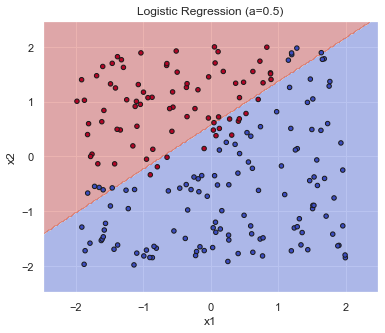

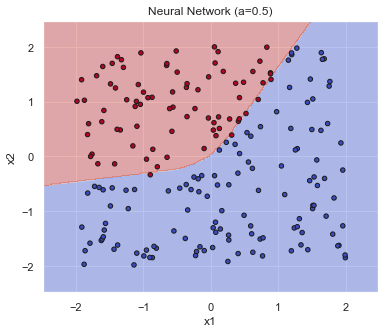

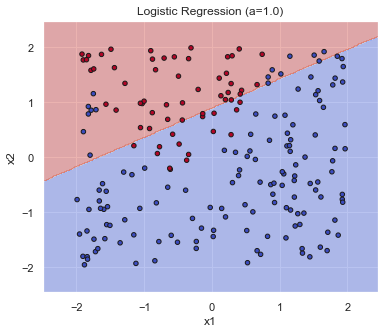

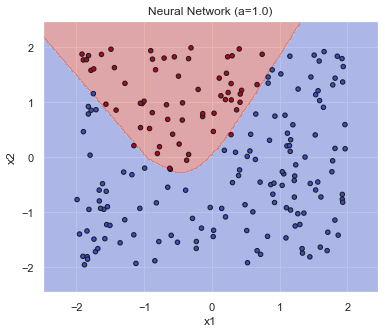

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

def generate_data(n=1000, a=0.5, imbalance=False):
    X = np.random.uniform(-2, 2, (n, 2))
    if imbalance:
        X[:int(0.7 * n), 1] += 2  # shift class A
    y = (X[:, 1] > a * (X[:, 0] ** 2) + X[:, 0]).astype(int)
    return X, y

def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

# run
X, y = generate_data(n=1000, a=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LogisticRegression().fit(X_train, y_train)
nn = MLPClassifier(hidden_layer_sizes=(16,), max_iter=1000).fit(X_train, y_train)

plot_decision_boundary(lr, X_test, y_test, "Logistic Regression (a=0.5)")
plot_decision_boundary(nn, X_test, y_test, "Neural Network (a=0.5)")


# run
X, y = generate_data(n=1000, a=1.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LogisticRegression().fit(X_train, y_train)
nn = MLPClassifier(hidden_layer_sizes=(16,), max_iter=1000).fit(X_train, y_train)

plot_decision_boundary(lr, X_test, y_test, "Logistic Regression (a=1.0)")
plot_decision_boundary(nn, X_test, y_test, "Neural Network (a=1.0)")


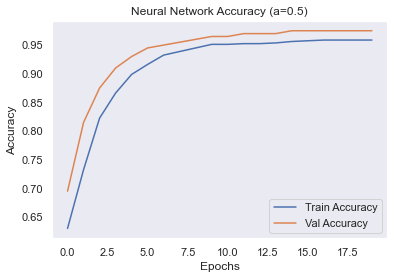

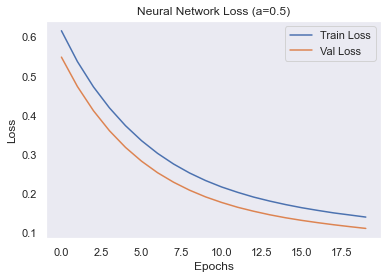

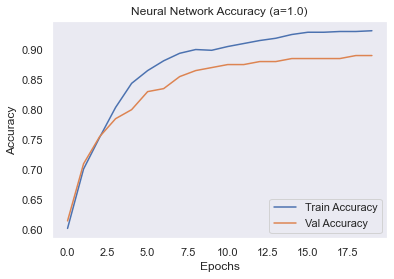

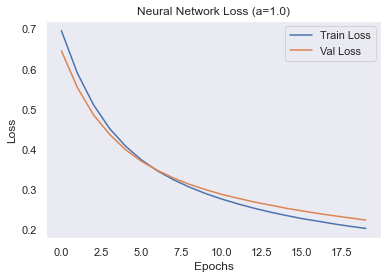

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import History
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Data
X, y = generate_data(1000, a=0.5)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = to_categorical(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, verbose=0)

# Plotting
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Neural Network Accuracy (a=0.5)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Neural Network Loss (a=0.5)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Data
X, y = generate_data(1000, a=1.0)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = to_categorical(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, verbose=0)

# Plotting
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Neural Network Accuracy (a=1.0)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Neural Network Loss (a=1.0)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


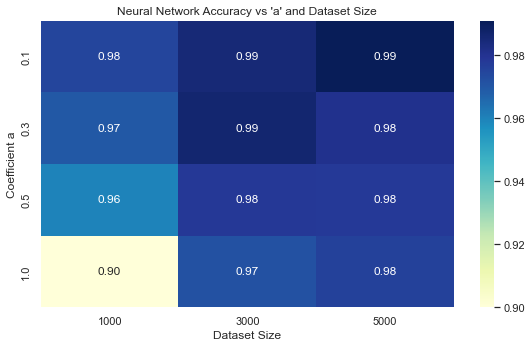

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


a_values = [0.1, 0.3, 0.5, 1.0]
sizes = [1000, 3000, 5000]

results = []
for a in a_values:
    for size in sizes:
        X, y = generate_data(size, a=a)
        y = to_categorical(y)
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        model = Sequential([
            Dense(16, input_dim=2, activation='relu'),
            Dense(2, activation='softmax')
        ])
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, verbose=0)
        acc = hist.history['val_accuracy'][-1]
        results.append({'a': a, 'size': size, 'accuracy': acc})

# Convert to DataFrame and pivot
df = pd.DataFrame(results)
pivot = df.pivot(index="a", columns="size", values="accuracy")


plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Neural Network Accuracy vs 'a' and Dataset Size")
plt.xlabel("Dataset Size")
plt.ylabel("Coefficient a")
plt.tight_layout()
plt.show()


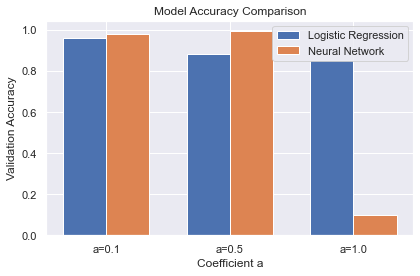

In [ ]:
import matplotlib.pyplot as plt

a_vals = [0.1, 0.5, 1.0]
lr_acc = [0.96, 0.885, 0.855]
nn_acc = [0.98, 0.995, 0.1]

x = np.arange(len(a_vals))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, lr_acc, width, label='Logistic Regression')
ax.bar(x + width/2, nn_acc, width, label='Neural Network')

ax.set_ylabel('Validation Accuracy')
ax.set_xlabel('Coefficient a')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels([f'a={a}' for a in a_vals])
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


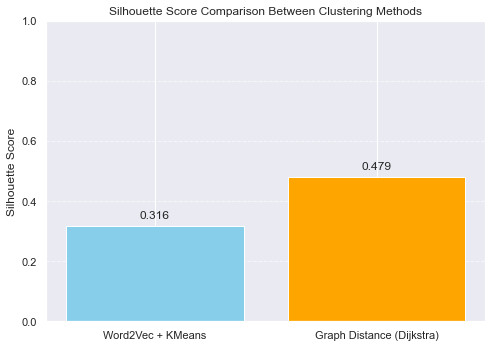

In [101]:
import matplotlib.pyplot as plt

# Silhouette scores from the code
methods = ['Word2Vec + KMeans', 'Graph Distance (Dijkstra)']
scores = [0.316, 0.479]

# Plotting
plt.figure(figsize=(7, 5))
bars = plt.bar(methods, scores, color=['skyblue', 'orange'])
plt.title("Silhouette Score Comparison Between Clustering Methods")
plt.ylabel("Silhouette Score")
plt.ylim(0, 1)

# Annotate scores
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{yval:.3f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


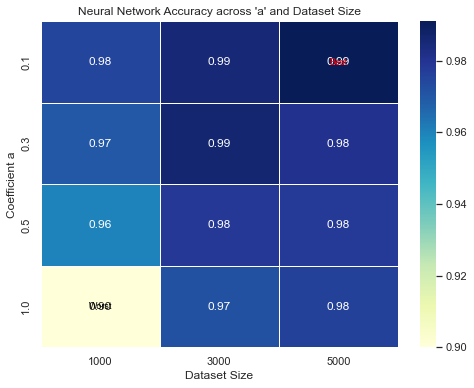

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
ax = sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

best = pivot.stack().idxmax()
worst = pivot.stack().idxmin()

ax.text(pivot.columns.get_loc(best[1]) + 0.5, pivot.index.get_loc(best[0]) + 0.5, 'Best', ha='center', va='center', color='red', fontsize=9)
ax.text(pivot.columns.get_loc(worst[1]) + 0.5, pivot.index.get_loc(worst[0]) + 0.5, 'Worst', ha='center', va='center', color='black', fontsize=9)

plt.title("Neural Network Accuracy across 'a' and Dataset Size")
plt.xlabel("Dataset Size")
plt.ylabel("Coefficient a")
plt.show()
